<div style="background-color: #E6E6FA; padding: 10px; border-radius: 5px;">
  <h1>Mobile Device Usage and User Behavior Dataset </h1>
</div>

<div style="background-color: #E6E6FA; padding: 10px; border-radius: 5px;">
  <h1>1️⃣ Section 1 - Introduction </h1>
</div>

  
<div style="text-align:justify;">
<p>This project dives into the world of mobile device usage to understand how different people use their smartphones. Using a dataset of 700  user profiles, including metrics such as app usage time, screen-on time, battery drain, and data consumption. Each entry is categorized into one of five user behavior classes, ranging from light to extreme usage, allowing for insightful analysis and modeling.Our goal is simple: to build a machine learning model that can automatically sort users into distinct groups based on their daily habits.</p></div>
<p> The data gives us detailed metrics that describe an <b>user's digital life</b>:</p>
<ol>
<li><b>User ID:</b> Unique identifier for each user.</li>
<li><b>Device Model:</b> Model of the user's smartphone.</li>
<li><b>Operating System:</b> The OS of the device (iOS or Android).</li>
<li><b>App Usage Time:</b> Daily time spent on mobile applications, measured in minutes.</li>
<li><b> Screen On Time:</b> Average hours per day the screen is active.</li>
<li><b>Battery Drain:</b> Daily battery consumption in mAh.</li>
<li><b>Number of Apps Installed:</b> Total apps available on the device.</li>
<li><b>Data Usage:</b> Daily mobile data consumption in megabytes.</li>
<li><b>Age:</b> Age of the user.</li>
<li><b>Gender:</b> Gender of the user (Male or Female).</li>
<li><b>User Behavior Class:</b> Classification of user behavior based on usage patterns (1 to 5).</li>

This dataset is ideal for researchers, data scientists, and analysts interested in understanding mobile user behavior and developing predictive models in the realm of mobile technology and applications. This Dataset was primarily designed to implement machine learning algorithms and is not a reliable source for a paper or article. The link to the dataset https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset</div> 

In [1]:
!pip install kaggle
#creating the Kaggle folder
import os
os.makedirs("/root/.kaggle", exist_ok=True)
#set permission
!chmod 600 /root/.kaggle/kaggle.json
#download dataset
!kaggle datasets download -d valakhorasani/mobile-device-usage-and-user-behavior-dataset
#unzip the dataset
!unzip mobile-device-usage-and-user-behavior-dataset.zip


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset
License(s): apache-2.0
100%|██████████████████████████████████████| 11.3k/11.3k [00:00<00:00, 22.1kB/s]

Archive:  mobile-device-usage-and-user-behavior-dataset.zip
  inflating: user_behavior_dataset.csv  


<img src="Healthcare Mobile App Development.jpeg" width="" align="" />

<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
<h2> The Classification Goal </h2>
</div>

<div style="text-align:justify;">
  <p> This <b>Multi-class classification model</b> analyses all these features to predict the <b>User Behaviour Class</b> (category from 1 to 5). These five classes represent levels of device dependency, varying from casual users to power users with heavy demands. This problem is categorized as <b>multiclass classification</b> because the target variable consists of more than two distinct categories. Unlike binary classification, the model must distinguish among multiple possible outcomes, increasing the complexity of decision boundaries and evaluation.</p>

<p> Moreover, the classes are <b>imbalanced,</b> meaning some classes have significantly more instances than others. This imbalance requires special handling to ensure that the model does not become biased towards the majority class. The evaluation metric will be <b>accuracy</b>, but <b>additional metrics like precision, recall, and F1-score</b> will be used to assess class-wise performance. This ensures the model performs well across all classes rather than only maximizing overall accuracy.</p>
<p> By successfully training this model, we can gain valuable insights for many applications, such as designing more efficient apps, creating targeted advertising, or helping manufacturers optimise battery life for specific user types. This project is a practical exercise in applying <b>predictive modelling</b> to understand and categorise human behaviour in the digital age.</p>
</div>


<div style="background-color: #E6E6FA; padding: 10px; border-radius: 5px;">
  <h2>🧭 The Road Map to a Machine Learning Project</h2>
</div>

  
<br>
The project follows a structured end-to-end workflow:
<ul>
  <li>Problem Definition</li>
  <li>Data Understanding & Exploration</li>
  <li>Data Cleaning & Preprocessing</li>
  <li>Feature Engineering & Selection</li>
  <li>Model Design and Learning Algorithms</li>
  <li>Model Evaluation and Interpretation</li>
  <li>Conclusion & Future Work</li>
</ul>

</div>


<div style="background-color: #E6E6FA; padding: 10px; border-radius: 5px;">
  <h1>2️⃣ Section 2 — Data Understanding & Exploration </h1></div>


<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> Importing Libraries</h3>
</div>

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import copy

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import joblib

<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
<h2> 🧾 Dataset Loading & Understanding </h2>
</div>

In this section, we load the dataset and perform an initial inspection to understand:
<ul>
  <li>Dataset Overview</li>
  <li>Feature Names and Data Types</li>
  <li>Basic distribution of the Target Classes</li>
  <li> Exploratory Data Analysis (EDA)</li>
</ul>
</div>


<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h2> 2.1 Dataset Overview</h2>
</div>

<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> Load the dataset</h3>
</div>

In [3]:
#Load the dataset
df = pd.read_csv("user_behavior_dataset.csv")

In [4]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [5]:
df.tail()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1
699,700,OnePlus 9,Android,212,5.4,1306,49,828,23,Female,3


<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h2> 2.2 Feature Names and Data Types</h2>
</div>

<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> Number of instances and features</h3>
</div>

In [6]:
print(f"The dataset has rows( No.of instances ): {df.shape[0]}")
print(f"The dataset has columns( No.of features ): {df.shape[1]}")

The dataset has rows( No.of instances ): 700
The dataset has columns( No.of features ): 11


<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> Column Names</h3>
</div>



In [7]:
df.columns #feature names

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')


<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> Dataset informations </h3>
</div>

In [8]:
df.info()
# we have 10 columns without considering User ID
# we can see data types also

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> Summary statistics</h3>
</div>

In [9]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h2> 2.3 Target Variable </h2>
</div>

<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> Identifying Target Variable </h3>
</div>

In [10]:
target_col = "User Behavior Class"
print("Target column:", target_col)

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

print("Feature matrix shape:", X.shape)
print("Target shape:", y.shape)
print("\nTarget unique classes:", sorted(y.unique()))
#  we have multiple classes

Target column: User Behavior Class
Feature matrix shape: (700, 10)
Target shape: (700,)

Target unique classes: [1, 2, 3, 4, 5]


<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> Class distribution </h3>
</div>


TARGET CLASS DISTRIBUTION SUMMARY
                     Count  Percentage (%)
User Behavior Class                       
1                      136           19.43
2                      146           20.86
3                      143           20.43
4                      139           19.86
5                      136           19.43


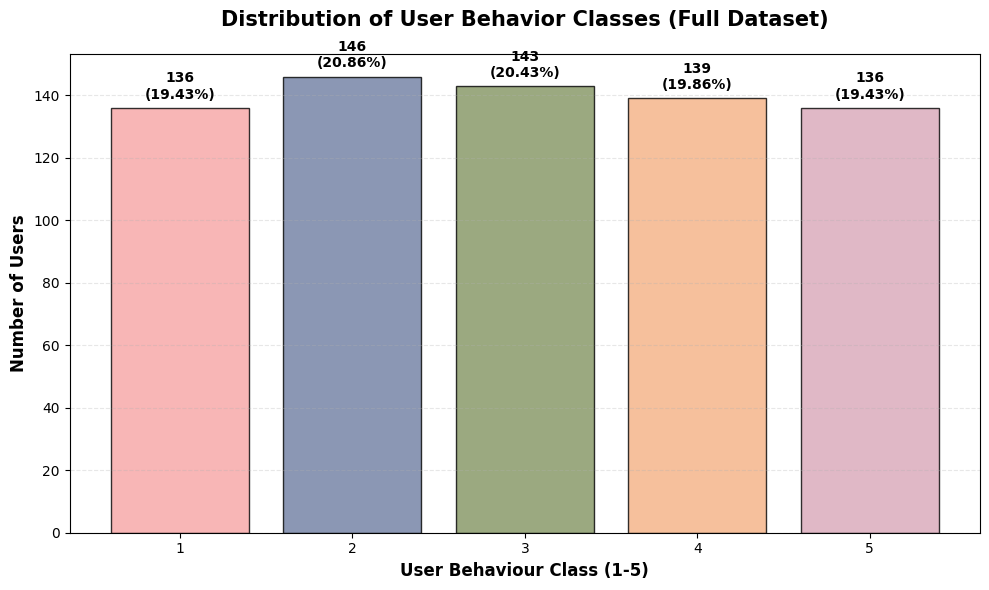


Imbalance Ratio (Majority:Minority): 1.07:1
Status: Classes are relatively balanced.


In [11]:
# Class Distribution Analysis

# 1. Calculate counts and percentages
class_counts = y.value_counts().sort_index()
class_percentages = (y.value_counts(normalize=True).sort_index() * 100).round(2)

# 2. Create a clean distribution summary table
distribution_summary = pd.DataFrame({
    'Count': class_counts,
    'Percentage (%)': class_percentages
})
distribution_summary.index.name = 'User Behavior Class'

print("\n" + "=" * 40)
print("TARGET CLASS DISTRIBUTION SUMMARY")
print("=" * 40)
print(distribution_summary)

# 3. Visualize the distribution
plt.figure(figsize=(10, 6))
colors = ['#F7A4A4', '#6E7DA2', '#829460', '#F4B183', '#D9A6B8']

# Create the bar plot
bars = plt.bar(class_counts.index, class_counts.values, color=colors, alpha=0.8, edgecolor='black')

# Formatting the plot
plt.title('Distribution of User Behavior Classes (Full Dataset)', fontweight='bold', fontsize=15, pad=20)
plt.xlabel('User Behaviour Class (1-5)', fontweight='bold', fontsize=12)
plt.ylabel('Number of Users', fontweight='bold', fontsize=12)
plt.xticks(class_counts.index)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# 4. Add count and percentage labels on top of each bar
for bar, count, pct in zip(bars, class_counts.values, class_percentages.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{int(count)}\n({pct}%)',
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

# Quick interpretation check
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"\nImbalance Ratio (Majority:Minority): {imbalance_ratio:.2f}:1")
if imbalance_ratio > 2:
    print("Status: Moderate to High Imbalance detected. Consider stratified splitting or class weights.")
else:
    print("Status: Classes are relatively balanced.")

<div style="background-color: #E6E6FA; padding: 10px; border-radius: 5px;">
  <h1>3️⃣ Section 3 — Exploratory Data Analysis ( EDA ) </h1></div>


<div> <p> <b>Exploratory Data Analysis (EDA)</b> is used to understand the structure, patterns, and relationships within the dataset before building any machine <br> learning model. In this section :</p>
<ul>
  <li>Examine categorical feature behavior</li>
  <li>Analyze numerical feature distributions</li>
  <li>Study relationships between features and the target class</li>
  <li>Identify patterns that may influence classification performance</li>
</ul>
</div>


<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> Separate Numerical and Categorical features</h3>
</div>

In [12]:
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['User ID', 'App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']
Categorical columns: ['Device Model', 'Operating System', 'Gender']


<div style="background-color: #E6E6FA; padding: 10px; border-radius: 5px;">
  <h2>✅ Categorical Variable Analysis </h2>
</div>

<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> Categorical features</h3>
</div>

In [13]:
#Extract class names for every categorical Variables
# Select categorical columns
categorical_cols = df.select_dtypes(include="object").columns
# Loop through each categorical column
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Device Model: ['Google Pixel 5' 'OnePlus 9' 'Xiaomi Mi 11' 'iPhone 12'
 'Samsung Galaxy S21']
Operating System: ['Android' 'iOS']
Gender: ['Male' 'Female']


<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> Categorical Data Analysis</h3>
</div>

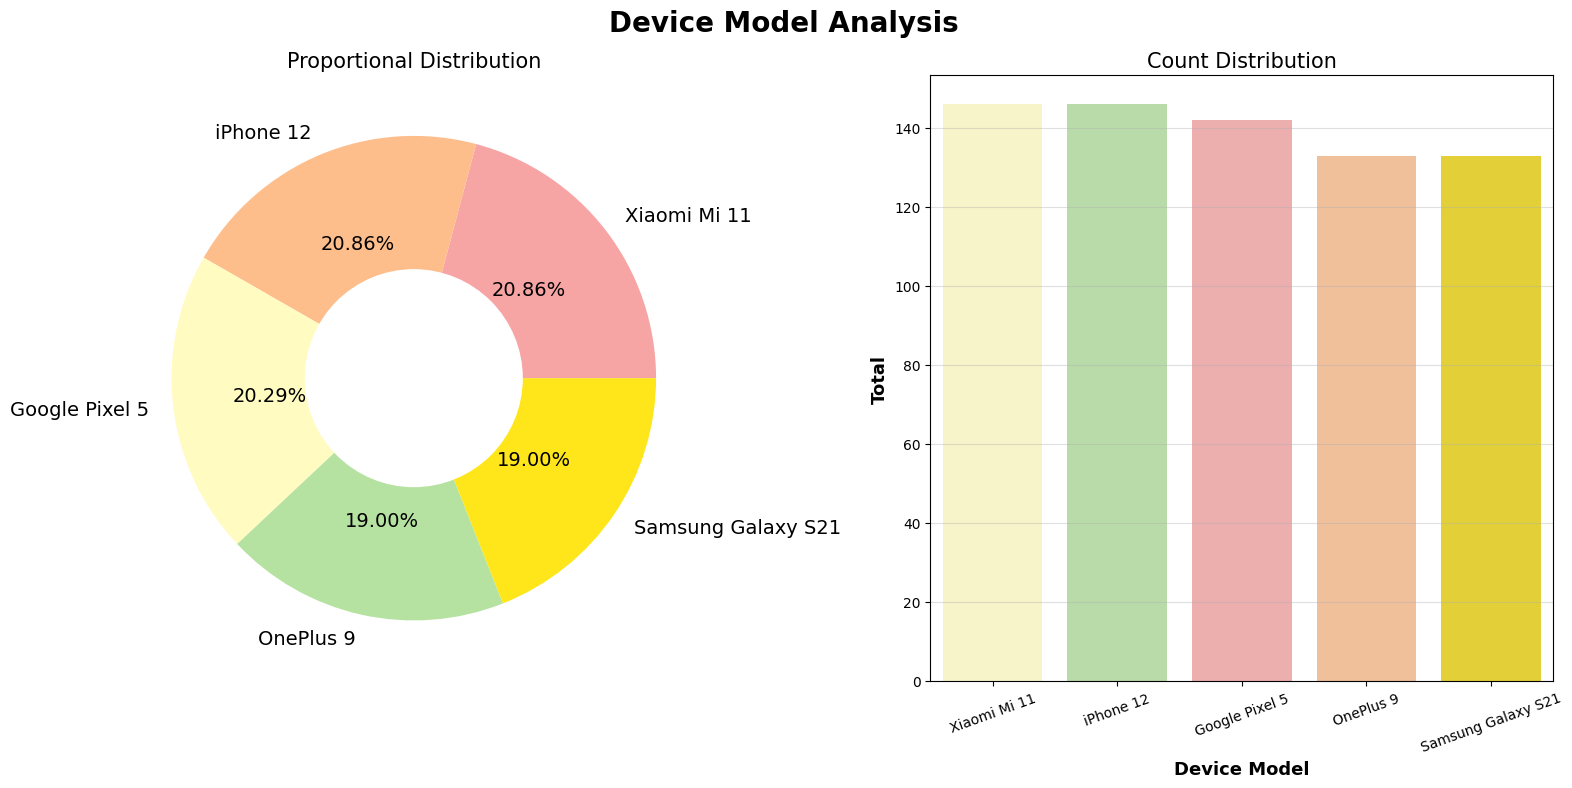

In [14]:
# Setting Colors, Labels, Order
colors= ['#F7A4A4', '#FEBE8C', '#FFFBC1', '#B6E2A1', "#FFE61B"]
order=df["Device Model"].value_counts().index
labels= order.tolist()


## Setting size & title of the figure
plt.figure(figsize=(16, 8))
plt.suptitle("Device Model Analysis", fontweight='heavy',
             fontsize='20', fontfamily='sans-serif')

## Pie chart
plt.subplot(1, 2, 1)
plt.pie(df["Device Model"].value_counts(), labels=labels, colors=colors,
        autopct='%.2f%%',  textprops={'fontsize': 14})
plt.title("Proportional Distribution", fontsize=15) # Added title for subplot
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

## Countplot
plt.subplot(1, 2, 2)
sns.countplot(x= "Device Model", data=df, hue="Device Model", palette=colors, order=order)
plt.title("Count Distribution", fontsize=15)
plt.xlabel( "Device Model", fontweight='bold', fontsize=13, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=13, fontfamily='sans-serif' )
plt.xticks(rotation = 20)
plt.grid(axis='y', alpha=0.4)

plt.tight_layout()
plt.show()

<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> Operating Systems Analysis based on Gender</h3>
</div>

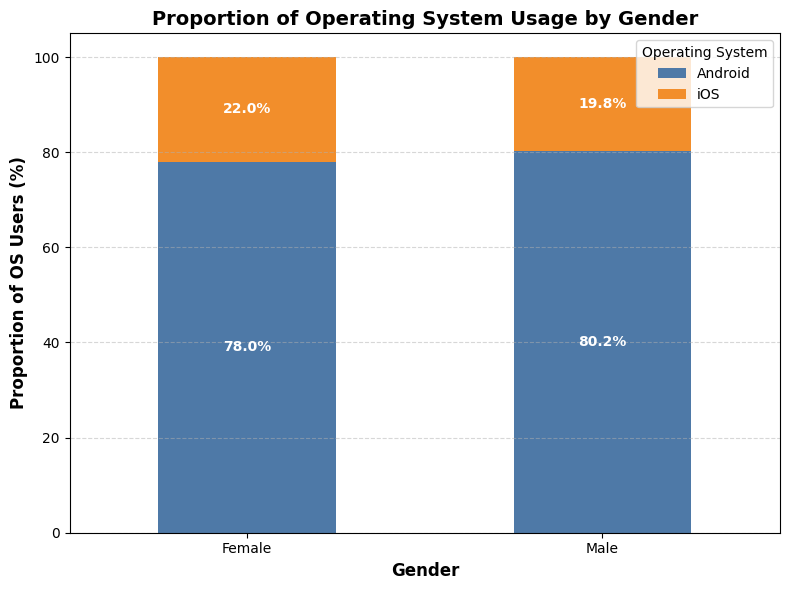

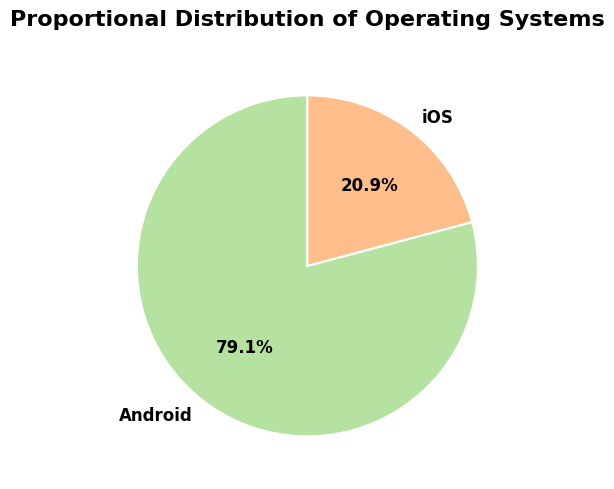

In [15]:
#BAR CHART
# Normalize by index (Gender) to get the proportion of OS within each Gender group

# "Out of all male/female users, what percentage use Android/iOS"
os_gender_crosstab = pd.crosstab(
    df['Gender'],
    df['Operating System'],
    normalize='index'
)

# Convert to percentage for plotting and labeling
os_gender_percentage = (os_gender_crosstab * 100)
# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
# Define colors (Blue for Android, Orange for iOS)
colors = ['#4e79a7', '#f28e2b']
# Plotting the stacked bar chart
os_gender_percentage.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors
)

# Add percentage labels inside the bars
for container in ax.containers:
    # Use list comprehension to format labels to 1 decimal place, ignoring labels if height is 0
    labels = [f'{w:.1f}%' if (w := p.get_height()) > 0 else '' for p in container]
    # Add the labels to the bars
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='white', fontweight='bold')
# Formatting the plot
plt.title("Proportion of Operating System Usage by Gender", fontweight='heavy', fontsize=14)
plt.xlabel("Gender", fontweight='bold', fontsize=12)
plt.ylabel("Proportion of OS Users (%)", fontweight='bold', fontsize=12)
plt.xticks(rotation=0) # Keep gender labels horizontal for readability
plt.legend(title='Operating System', loc='upper right')
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()



#PIE CHART
## Drawing a PIE CHART for operating systems
os_counts = df['Operating System'].value_counts()
# Define colors and labels
colors = ['#B6E2A1', '#FEBE8C']
labels = os_counts.index.tolist()
# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    os_counts,
    labels=labels,
    colors=colors,
    autopct='%.1f%%',        # Format the percentage to one decimal place
    startangle=90,           # Start the first slice at the top for better visualization
    textprops={'fontsize': 12, 'color': 'black', 'fontweight': 'bold', 'fontfamily':'sans-serif'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5} # Add white borders for contrast
)
# Add a title
plt.title("Proportional Distribution of Operating Systems",
          fontweight='heavy', fontsize='16', pad=20)

plt.tight_layout()
plt.show()

<div style="background-color: #E6E6FA; padding: 10px; border-radius: 5px;">
  <h2>✅ Numerical Variable Analysis </h2>
</div>

<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> Numerical feature Values</h3>
</div>

In [16]:
for col in numerical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

User ID: 700 unique values
App Usage Time (min/day): 387 unique values
Screen On Time (hours/day): 108 unique values
Battery Drain (mAh/day): 628 unique values
Number of Apps Installed: 86 unique values
Data Usage (MB/day): 585 unique values
Age: 42 unique values


<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> Numerical Data Analysis</h3>
</div>

**Skewness and kurtosis** describe the shape of your data in simple terms that matter for machine‑learning models. Skewness tells you if most values sit on one side, which can affect algorithms that assume balanced distributions. Kurtosis shows whether the data has many extreme values, something that can influence model stability and error rates. The box plot helps you spot outliers quickly, while the histogram with a smooth curve shows how the data is spread out. Together, they give a clear picture of whether your feature might need scaling, transformation, or cleaning before training a model.

In [17]:
def draw_boxPlot_and_histogram(var, color):
    # Setting var, color
    var = var
    color = color

    #  Skewness & Kurtosis
    print(f'\033[1m  {var} Column Skewness & Kurtosis  \033[0m')
    print('*' * 40)
    print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
    print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
    print('\n')

    ## Setting size & title of the figure
    plt.figure(figsize=(16, 8))
    plt.suptitle(f"{var} Column Distribution", fontweight='heavy', fontsize='20', fontfamily='sans-serif')

    # Box Plot
    plt.subplot(1, 2, 1)
    plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
    sns.boxplot(data=df, y= var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
    plt.ylabel(var, fontweight='regular', fontsize=11, fontfamily='sans-serif')

    # --- Histogram ---
    plt.subplot(1, 2, 2)
    plt.title('Histogram Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
    sns.histplot(data= df, x= var, kde=True, color= color)
    plt.xlabel('Total', fontweight='regular', fontsize=11, fontfamily='sans-serif')
    plt.ylabel(var, fontweight='regular', fontsize=11, fontfamily='sans-serif')

    plt.show()

<div style="background-color: #E6E6FA; padding: 1px; border-radius: 2px;">
    <h4> App Usage Time (min/day) </h4>
</div>

  App Usage Time (min/day) Column Skewness & Kurtosis  
****************************************
Skewness: 0.372
Kurtosis: -1.260




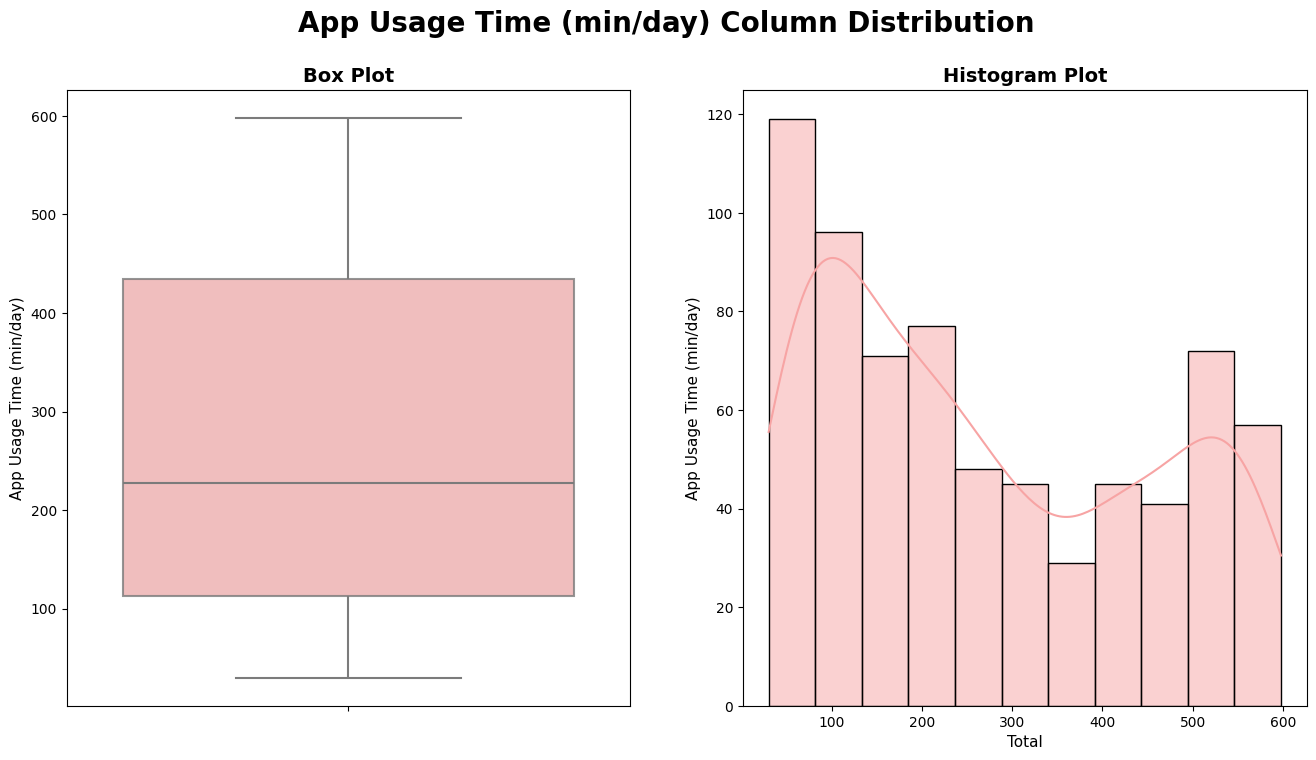

In [18]:
#calling above functions
draw_boxPlot_and_histogram("App Usage Time (min/day)", '#F7A4A4')

<div style="background-color: #E6E6FA; padding: 1px; border-radius: 2px;">
    <h4> Screen On Time (hours/day) </h4>
</div>

  Screen On Time (hours/day) Column Skewness & Kurtosis  
****************************************
Skewness: 0.460
Kurtosis: -0.818




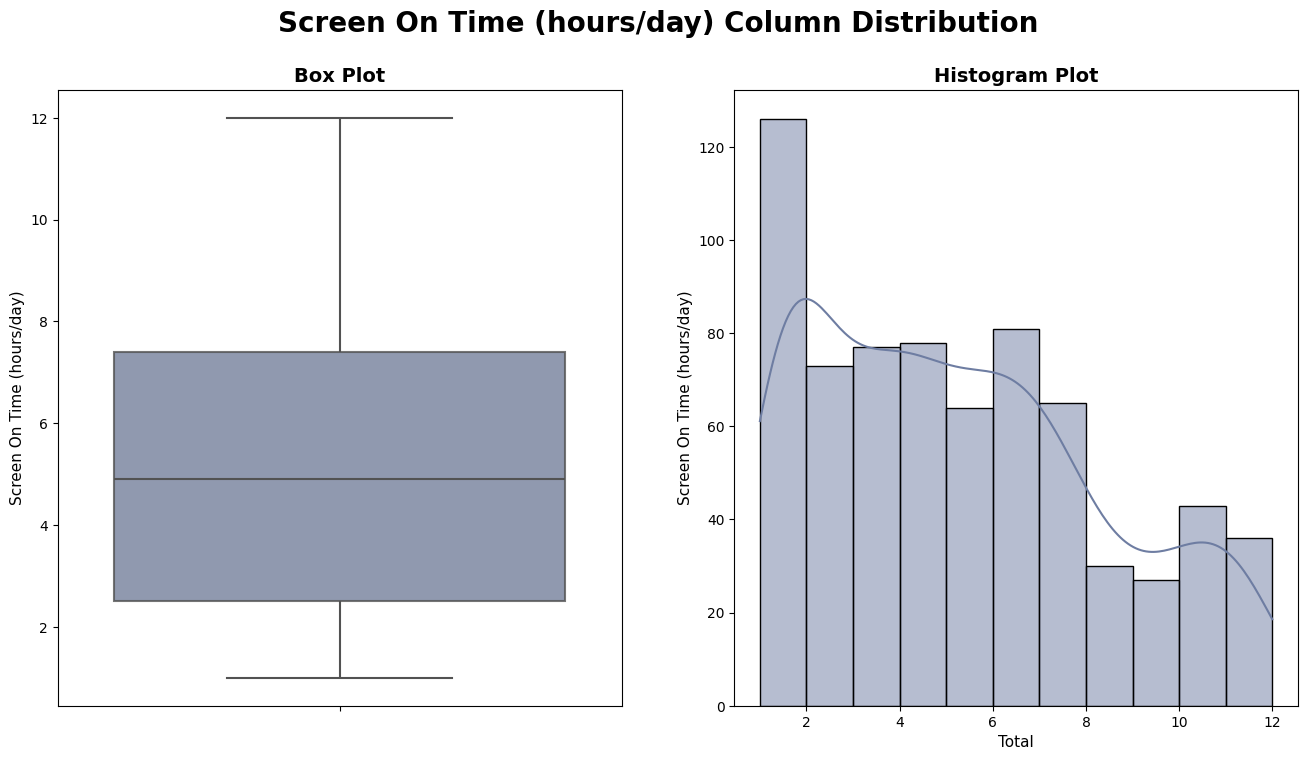

In [19]:
draw_boxPlot_and_histogram("Screen On Time (hours/day)", '#6E7DA2')

<div style="background-color: #E6E6FA; padding: 1px; border-radius: 2px;">
    <h4> Battery Drain (mAh/day) </h4>
</div>

  Battery Drain (mAh/day) Column Skewness & Kurtosis  
****************************************
Skewness: 0.135
Kurtosis: -1.275




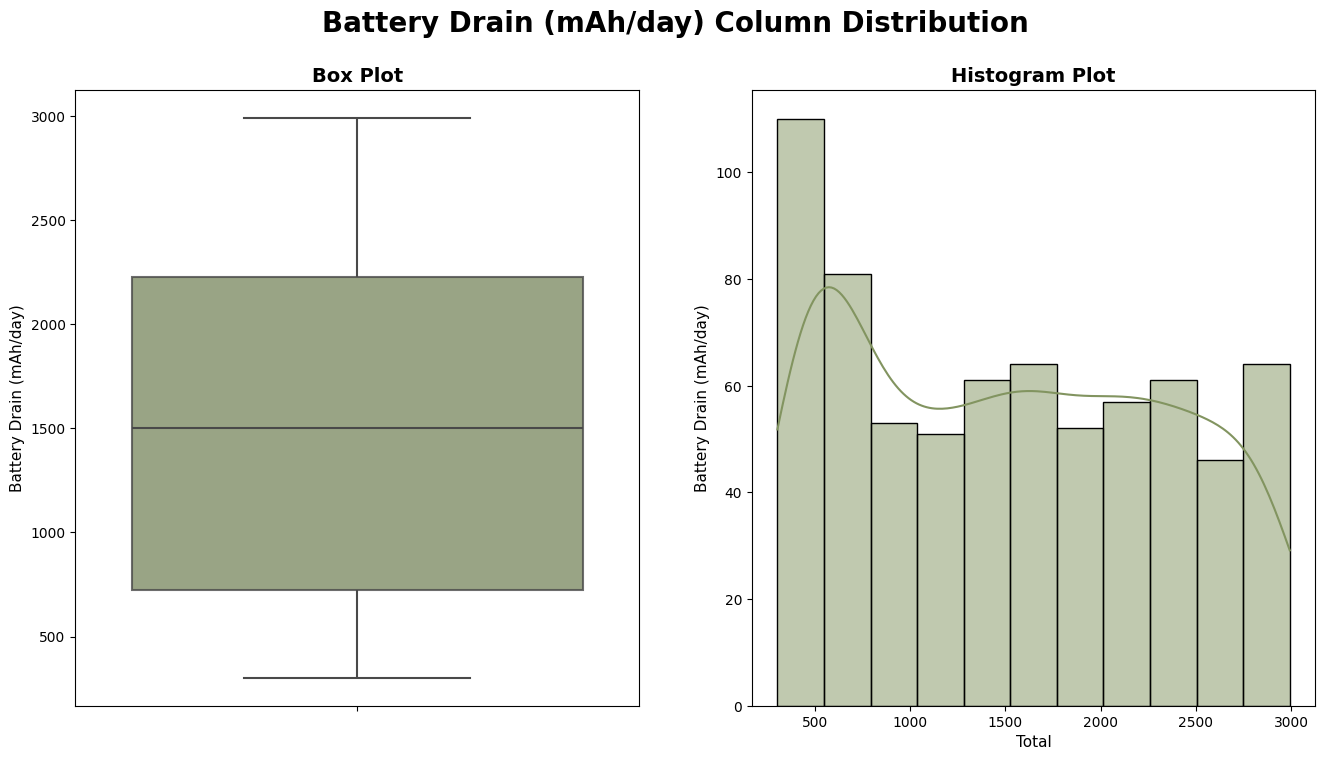

In [20]:
draw_boxPlot_and_histogram("Battery Drain (mAh/day)", "#829460")

<div style="background-color: #E6E6FA; padding: 1px; border-radius: 2px;">
    <h4> Number of Apps Installed </h4>
</div>

  Number of Apps Installed Column Skewness & Kurtosis  
****************************************
Skewness: 0.112
Kurtosis: -1.255




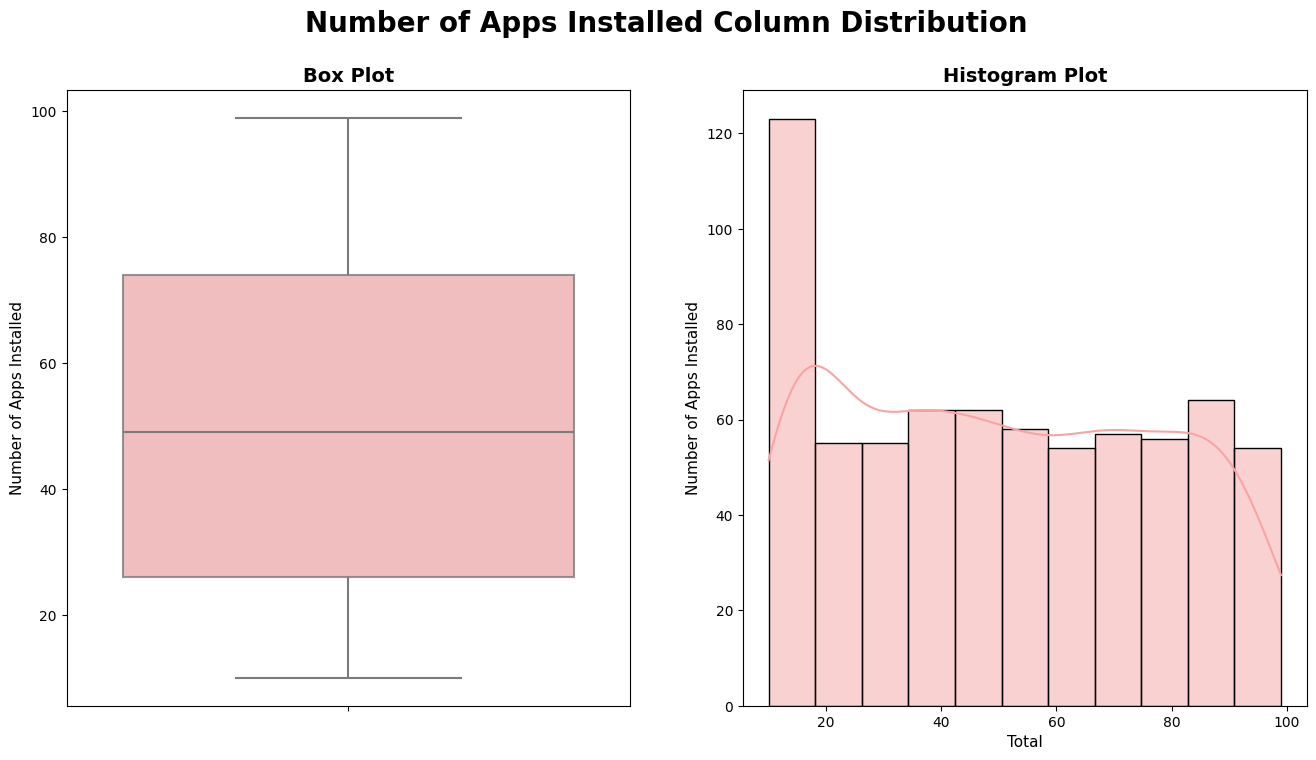

In [21]:
draw_boxPlot_and_histogram("Number of Apps Installed", '#F7A4A4')

<div style="background-color: #E6E6FA; padding: 1px; border-radius: 2px;">
    <h4> Data Usage (MB/day)</h4>
</div>

  Data Usage (MB/day) Column Skewness & Kurtosis  
****************************************
Skewness: 0.699
Kurtosis: -0.460




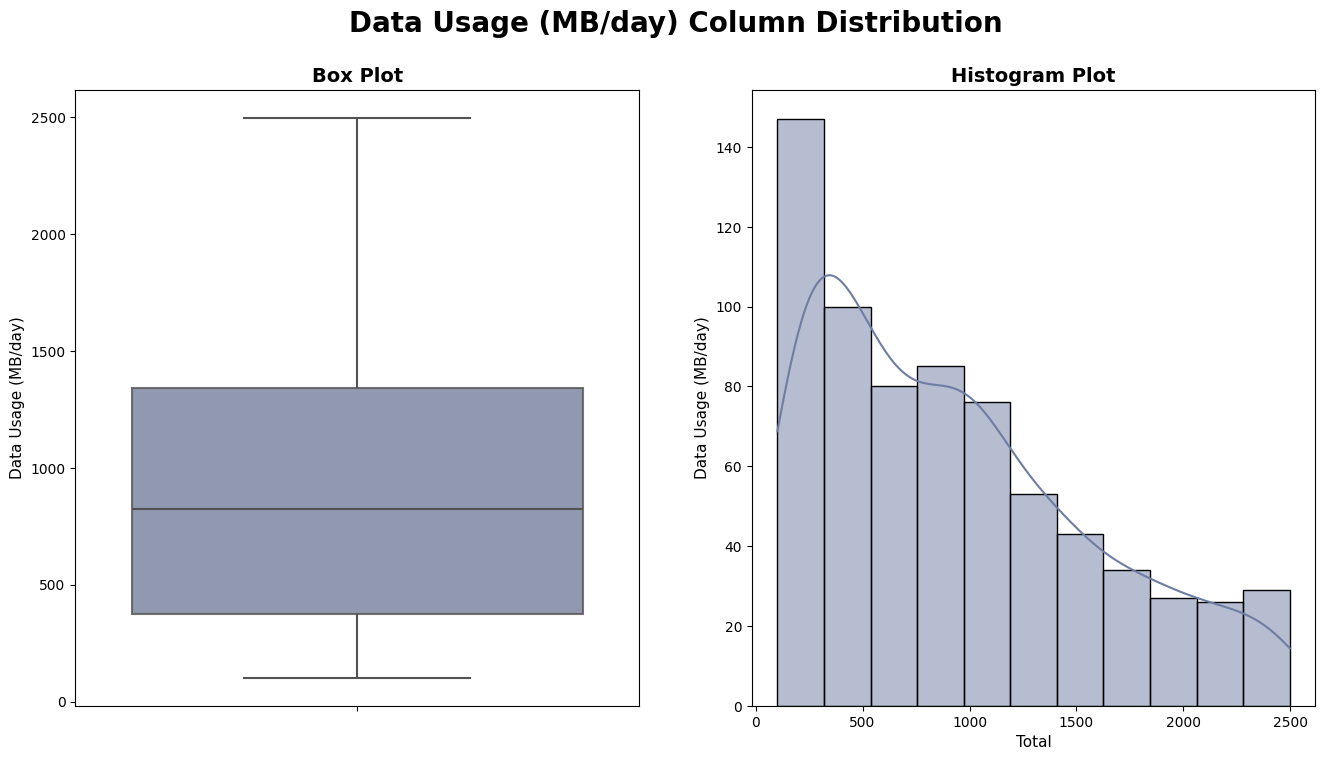

In [22]:
draw_boxPlot_and_histogram("Data Usage (MB/day)", '#6E7DA2')

<div style="background-color: #E6E6FA; padding: 1px; border-radius: 2px;">
    <h4> Age </h4>
</div>

  Age Column Skewness & Kurtosis  
****************************************
Skewness: 0.028
Kurtosis: -1.235




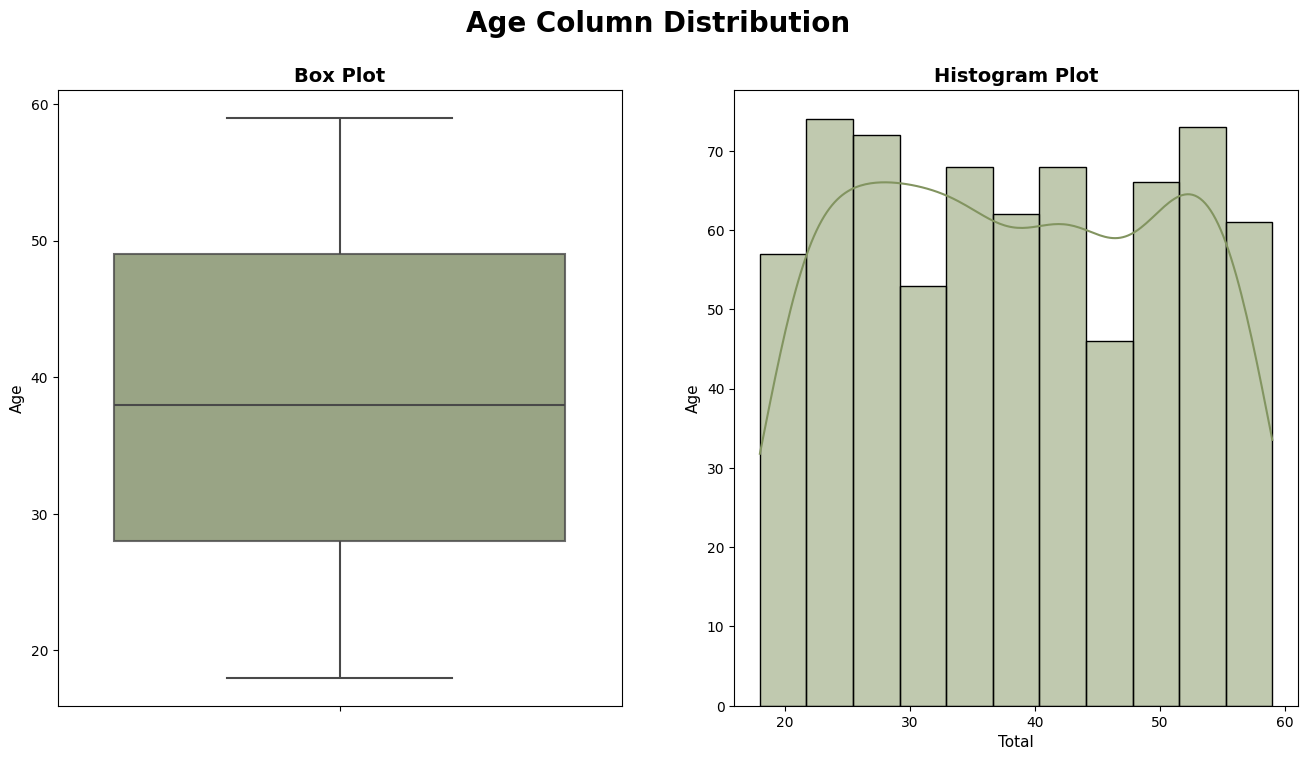

In [23]:
draw_boxPlot_and_histogram("Age", "#829460")

<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> Comparing Target feature with other features</h3>
</div>

<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> ✅ Target vs Numerical features</h3>
</div>



Each numeric feature differs across the User behavior classes. The box plot shows the median, quartiles, and spread of values for each class. This helps you see whether a feature’s values shift up or down for different classes, which hints at how useful it might be for classification. 
**Big gaps between medians** or **wider boxes** suggest **strong class separation** or **noisy data**. Outliers become easy to spot, helping you judge data quality.

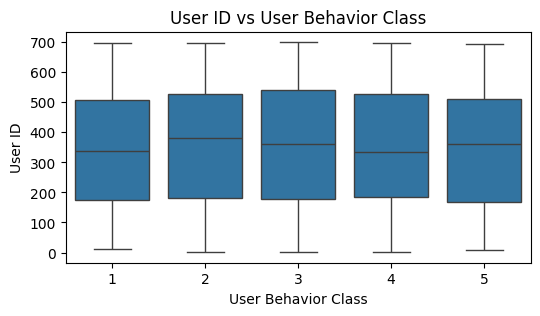

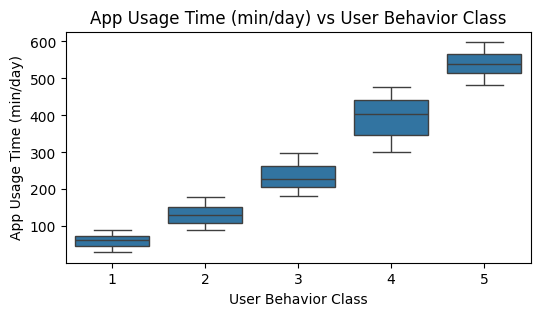

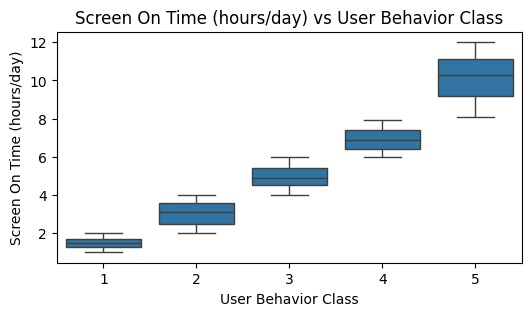

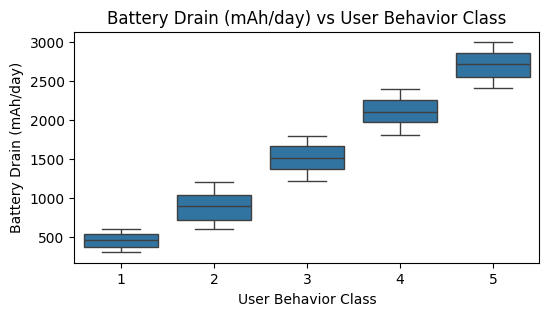

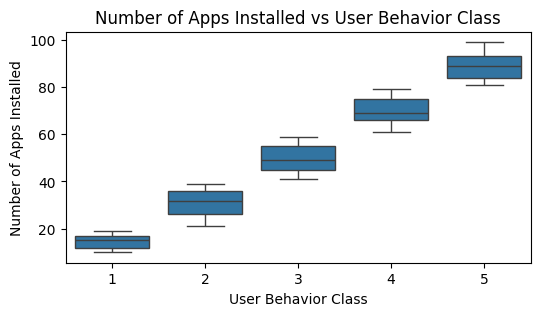

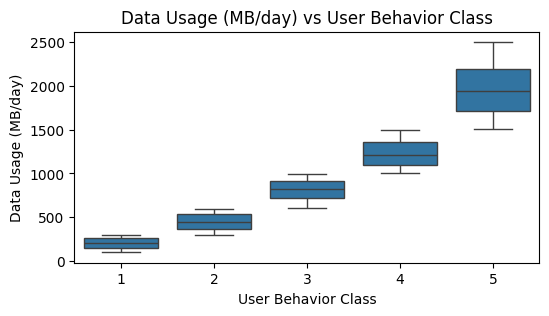

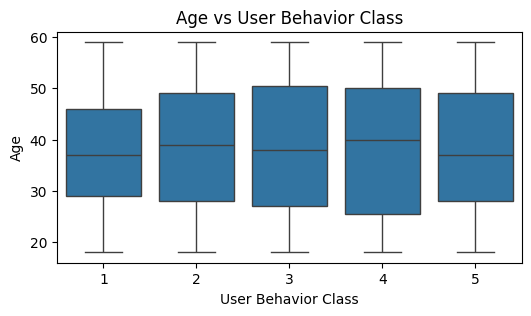

In [24]:
for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=y, y=df[col])
    plt.title(f"{col} vs User Behavior Class")
    plt.show()


<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> ✅ Target vs Categorical features</h3>
</div>



It shows how often each category appears and how those counts differ between classes. This helps you to analyse easily which categories are linked to certain classes and which ones aren’t very informative. 

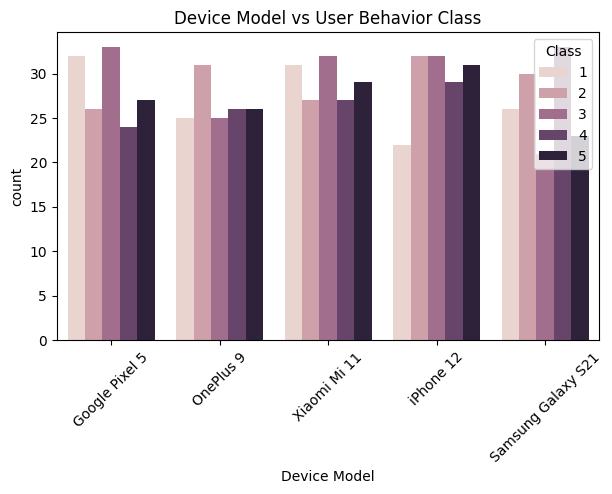

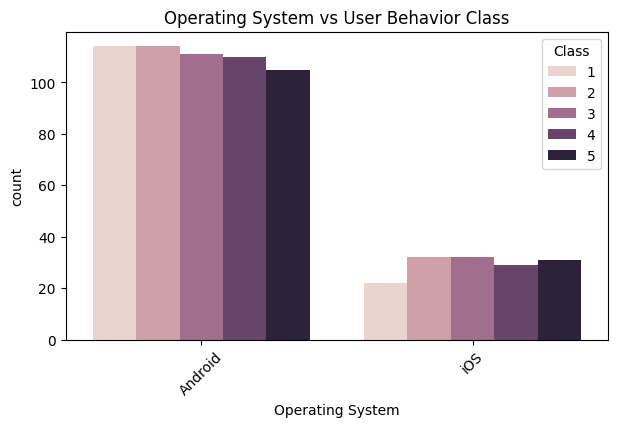

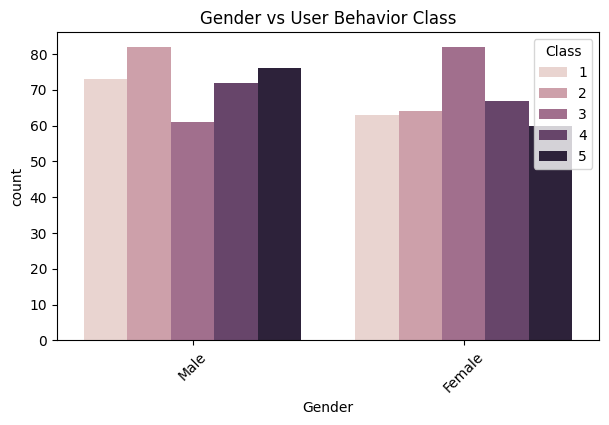

In [25]:
for col in categorical_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=df[col], hue=y)
    plt.title(f"{col} vs User Behavior Class")
    plt.xticks(rotation=45)
    plt.legend(title="Class")
    plt.show()


<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> Correlation analysis </h3>
</div>


Correlation analysis gives you a quick look at how strongly your numerical features relate to one another before preprocessing. Strong positive or negative correlations can reveal redundant features that might confuse certain models. Very low correlations show features that provide unique information. This helps identify **linear relationships between Numerical features** and **detect Potential Redundancy**




Important :- User ID shows negative values and very weak correlations with the other features, which suggests it doesn’t carry meaningful information for the model. Since it’s simply an identifier and not related to user behavior, it’s safe to remove it from the feature set.

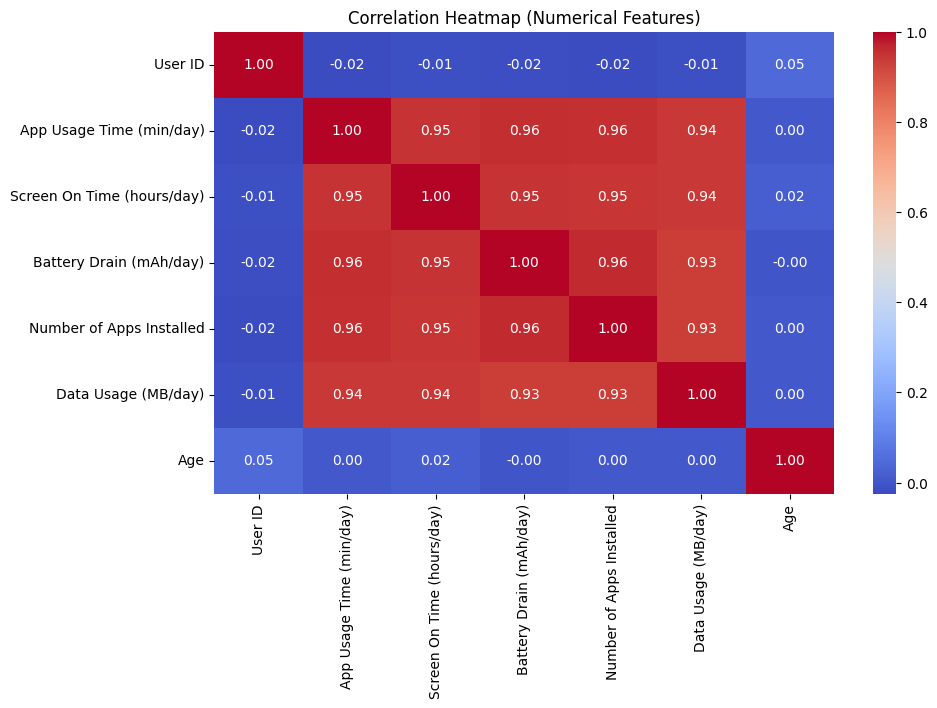

In [26]:
plt.figure(figsize=(10,6))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


<div style="background-color: #E6E6FA; padding: 10px; border-radius: 5px;">
  <h1>4️⃣ Section 4 — Data Cleaning & Preprocessing  </h1>
</div>

<div>
<p> Before building a machine learning model, the dataset must be cleaned and transformed into a numerical format suitable for learning algorithms.<br> In this section, we perform:</p>
<ul>
  <li>Checking Data Quality ( Missing values, Duplicates.. )</li>
  <li>Removal of non-informative identifiers ( User ID )</li>
  <li>Data Splitting ( Train, Validation, Test ) </li>
  <li>Feature Selection and engineering ( Section 5 )</li>

</ul> 
<p> These are ensured the data quality, consistency, and comparability across features.
</div>


<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> 4.1 Check missing values and duplicates</h3>
</div>

<div style="background-color: #E7E7E7; padding: 1px; border-radius: 2px;">
  <h4> Checking missing values </h4>
</div>

In [27]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

<div style="background-color: #E7E7E7; padding: 1px; border-radius: 2px;">
  <h4> Checking Duplicates </h4>
</div>

In [28]:
df.duplicated().sum()

0

<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3>4.2 Removing identifier Column</h3>
</div>



<div>
 <p>  The <b>User ID</b> column is an identifier and does not carry predictive information. Therefore, it is removed before further processing.</p>
</div>

In [29]:
df_clean = df.drop(columns=["User ID"])
df_clean.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3>4.3 Data Splitting (Train, Validation, Test)</h3>
</div>



<div><p> Data splitting is a critical step in machine learning that divides the dataset into different subsets for different purposes:</p>
  </div>
  <div>
    <ul>
      <li>
        <strong>Training Set (70%)</strong>: Used to train the machine learning model.
        The model learns patterns and relationships from this data.
      </li>
      <li>
        <strong>Validation Set (15%)</strong>: Used to tune hyperparameters and validate
        the model during training. Helps prevent overfitting.
      </li>
      <li>
        <strong>Test Set (15%)</strong>: Used to evaluate the final model's performance
        on unseen data. This provides an unbiased estimate of model generalization.
      </li>
    </u
<div>
    <h4 style="color:#0A2540;"><strong>Why is this important?</strong></h4>
  </div>
  <div>
    <ul>
      <li>Prevents overfitting (model memorizing training data)</li>
      <li>Provides realistic performance metrics</li>
      <li>Ensures fair model evaluation</li>
      <li>Helps in hyperparameter tuning without biasing the test set</li>
    </ul>
  </div>
</div>

In [30]:
# 1. Define Features (X) and Target (y)
# We use df_clean (the dataframe without 'User ID')
target_col = 'User Behavior Class'
X = df_clean.drop(columns=[target_col])
y = df_clean[target_col].astype(int)

# 2. First Split: Separate Training set (70%) and a temporary set (30%)
# 'stratify=y' ensures the class distribution is preserved across sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

# 3. Second Split: Divide the temporary set into Validation and Test (50/50 of the 30%)
# This results in: 70% Train, 15% Validation, 15% Test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp
)

# 4. Display the results to verify the split
print(f"Data splitting ")
print(f"   - Training Samples   : {X_train.shape[0]}")
print(f"   - Validation Samples : {X_val.shape[0]}")
print(f"   - Test Samples       : {X_test.shape[0]}")
print(f"   - Total Features     : {X_train.shape[1]}")

Data splitting 
   - Training Samples   : 490
   - Validation Samples : 105
   - Test Samples       : 105
   - Total Features     : 9


<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> 4.4 Dataset Shape Summary </h3>
</div>


FINAL DATASET SUMMARY
       Set  Samples  Features Percentage
  Training      490         9     70.00%
Validation      105         9     15.00%
      Test      105         9     15.00%
     Total      700         9    100.00%


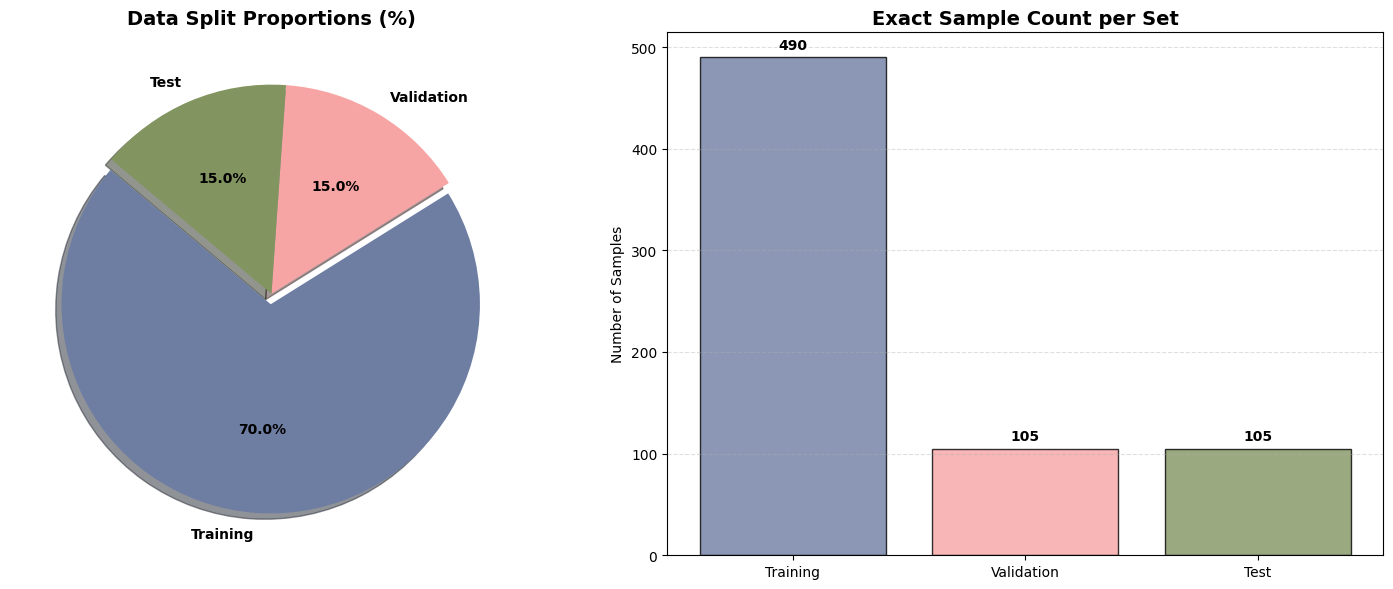

In [31]:
total_len = X.shape[0]

summary_data = {
    'Set': ['Training', 'Validation', 'Test', 'Total'],
    'Samples': [X_train.shape[0], X_val.shape[0], X_test.shape[0], total_len],
    'Features': [X_train.shape[1], X_val.shape[1], X_test.shape[1], X.shape[1]],
    'Percentage': [f"{X_train.shape[0]/total_len*100:.2f}%",
                   f"{X_val.shape[0]/total_len*100:.2f}%",
                   f"{X_test.shape[0]/total_len*100:.2f}%", "100.00%"]
}
summary_df = pd.DataFrame(summary_data)

print("\n" + "=" * 80)
print("FINAL DATASET SUMMARY")
print("=" * 80)
print(summary_df.to_string(index=False))

# 2. Visualize Sample Distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie Chart (by Proportions)
sizes = [X_train.shape[0], X_val.shape[0], X_test.shape[0]]
labels = ['Training', 'Validation', 'Test']
colors = ['#6E7DA2', '#F7A4A4', '#829460']
explode = (0.05, 0, 0) # Slightly separate the training set

axes[0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140, textprops={'fontweight': 'bold'})
axes[0].set_title('Data Split Proportions (%)', fontsize=14, fontweight='bold')

# Bar Chart (Exact Counts)
sets = ['Training', 'Validation', 'Test']
counts = [X_train.shape[0], X_val.shape[0], X_test.shape[0]]
bars = axes[1].bar(sets, counts, color=colors, edgecolor='black', alpha=0.8)

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval),
                 ha='center', va='bottom', fontweight='bold')

axes[1].set_title('Exact Sample Count per Set', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Samples')
axes[1].grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

<div style="background-color: #E6E6FA; padding: 10px; border-radius: 5px;">
  <h1>5️⃣ Section 5 — Feature Engineering & Selection   </h1>
</div>

<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> 5.1 Definition of Features </h3></div>

Short overview of the features where we separate the target and ID columns, identify which features are categorical or numerical after preprocessing is applied. It also lists each categorical feature with its unique values and how often they appear, helping you spot imbalance or rare categories with their percentages.

In [32]:
#  5.1 Define Feature
TARGET_COL = 'User Behavior Class'
ID_COL = 'User ID'

# Isolate features and target
X = df.drop(columns=[TARGET_COL, ID_COL]).copy()
y = df[TARGET_COL].copy()

#Feature seperation as categorical and numerical
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define the Encoder 
cat_encoder = OneHotEncoder(
    drop='if_binary',
    sparse_output=False,
    handle_unknown='ignore'
)

print(f"Features: {len(categorical_cols)} categorical &  {len(numerical_cols)} numerical features")
print(f"Total feature count:  {X.shape[1]}")
print(f"Categorical features: {categorical_cols}")
print(f"Numerical features:   {numerical_cols}")

print("\n" + "=" * 80)
print("CATEGORICAL COLUMNS REFERENCE")
print("=" * 80)
for col in categorical_cols:
    unique_vals = X[col].unique()
    print(f"\n{col}:")
    for val in sorted(unique_vals):
        count = (X[col] == val).sum()
        pct = (count / len(X)) * 100
        print(f"  • {val}: {count} samples ({pct:.1f}%)")

Features: 3 categorical &  6 numerical features
Total feature count:  9
Categorical features: ['Device Model', 'Operating System', 'Gender']
Numerical features:   ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']

CATEGORICAL COLUMNS REFERENCE

Device Model:
  • Google Pixel 5: 142 samples (20.3%)
  • OnePlus 9: 133 samples (19.0%)
  • Samsung Galaxy S21: 133 samples (19.0%)
  • Xiaomi Mi 11: 146 samples (20.9%)
  • iPhone 12: 146 samples (20.9%)

Operating System:
  • Android: 554 samples (79.1%)
  • iOS: 146 samples (20.9%)

Gender:
  • Female: 336 samples (48.0%)
  • Male: 364 samples (52.0%)


<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> 5.2  Feature scaling (Standard Scalar technique)</h3>
</div>

<div><p> Numerical features have different units and scales. To ensure equal contribution during model learning, We apply <b>Standard Scalar</b><br> to numerical features.
</div>


In [33]:
# Formula: z = (x - u) / s; Where 'u' is the mean and 's' is the standard deviation.
num_scaler = StandardScaler()

print(f"Targeting {len(numerical_cols)} numerical features for scaling:")
for col in numerical_cols:
    print(f"  • {col}")

Targeting 6 numerical features for scaling:
  • App Usage Time (min/day)
  • Screen On Time (hours/day)
  • Battery Drain (mAh/day)
  • Number of Apps Installed
  • Data Usage (MB/day)
  • Age


<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">



  <h3> 5.3  Feature and Target seperation </h3>
</div>





As mentioned before in the correlation Analysis, we found User ID is an unique identifier.It can be removed so the model can focuse on patterns rather than memorizing specific users. We separate the Target Variable (the answer the model needs to predict) from the Feature Matrix (the data the model uses to learn).

In [34]:
# 1. Define the target variable
y = df['User Behavior Class'].copy()

# 2. Define the features (X)
# We drop the Target and the unique identifier 'User ID'
X = df.drop(columns=['User Behavior Class', 'User ID']).copy()

print(f"Target vector (y) -> Shape: {y.shape}")
print(f"Feature matrix (X) -> Shape: {X.shape}")
print("\nFeatures to be used for training:")
print(X.columns.tolist())

Target vector (y) -> Shape: (700,)
Feature matrix (X) -> Shape: (700, 9)

Features to be used for training:
['Device Model', 'Operating System', 'App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender']


 <div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> 5.4  Pipeline of the Model </h3>
</div>


This step executes the transformation logic defined in our preprocessor. We fit the preprocessor on the training data to learn the scaling parameters (mean/standard deviation) and category mappings, then transform all three datasets. This ensures that the validation and test sets are processed using only the statistics derived from the training set, maintaining strict experimental integrity.

In [35]:
# Create the Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_encoder, categorical_cols), # From Section 5.1
        ('num', num_scaler, numerical_cols)    # From Section 5.2
    ],
    remainder='passthrough'
)

# Fit on training data ONLY
preprocessor.fit(X_train)

# Get feature names for the new processed DataFrames
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()
processed_feature_names = cat_features + numerical_cols

# Transform all sets and convert back to DataFrames
X_train_processed = pd.DataFrame(preprocessor.transform(X_train), columns=processed_feature_names)
X_val_processed = pd.DataFrame(preprocessor.transform(X_val), columns=processed_feature_names)
X_test_processed = pd.DataFrame(preprocessor.transform(X_test), columns=processed_feature_names)

print("=" * 80)
print("PREPROCESSING EXECUTION SUMMARY")
print("=" * 80)
print(f"Original Feature Count:  {X_train.shape[1]}")
print(f"Processed Feature Count: {X_train_processed.shape[1]} (due to One-Hot Encoding)")
print(f"Training Data Shape:     {X_train_processed.shape}")

PREPROCESSING EXECUTION SUMMARY
Original Feature Count:  9
Processed Feature Count: 13 (due to One-Hot Encoding)
Training Data Shape:     (490, 13)


<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> 5.5 Correlation Analysis</h3>
</div>

Correlation analysis describes how numerical features move in relation to one another. It highlights whether two variables rise and fall together, move in opposite directions, or show no consistent pattern at all. 
- Strong positive or negative values can signal redundancy, meaning two features may be carrying the same information. 
- Near‑zero values point to features that contribute unique signals. Because it measures only linear relationships and is sensitive to outliers, it doesn’t capture more complex patterns and isn’t appropriate for categorical or non‑linear data.
- We focused on **feature‑to‑target correlations** here not feature‑to‑feature relationships. The visualization appears as a single‑column by showing how strongly each processed feature aligns linearly with the target.


CORRELATION ANALYSIS WITH TARGET VARIABLE (Training Data)
Number of Apps Installed           0.981766
Battery Drain (mAh/day)            0.978729
App Usage Time (min/day)           0.970871
Screen On Time (hours/day)         0.965690
Data Usage (MB/day)                0.946215
Device Model_iPhone 12             0.059380
Operating System_iOS               0.059380
Device Model_Samsung Galaxy S21    0.028940
Age                               -0.011624
Device Model_Google Pixel 5       -0.015962
Gender_Male                       -0.017042
Device Model_Xiaomi Mi 11         -0.025863
Device Model_OnePlus 9            -0.048116
dtype: float64


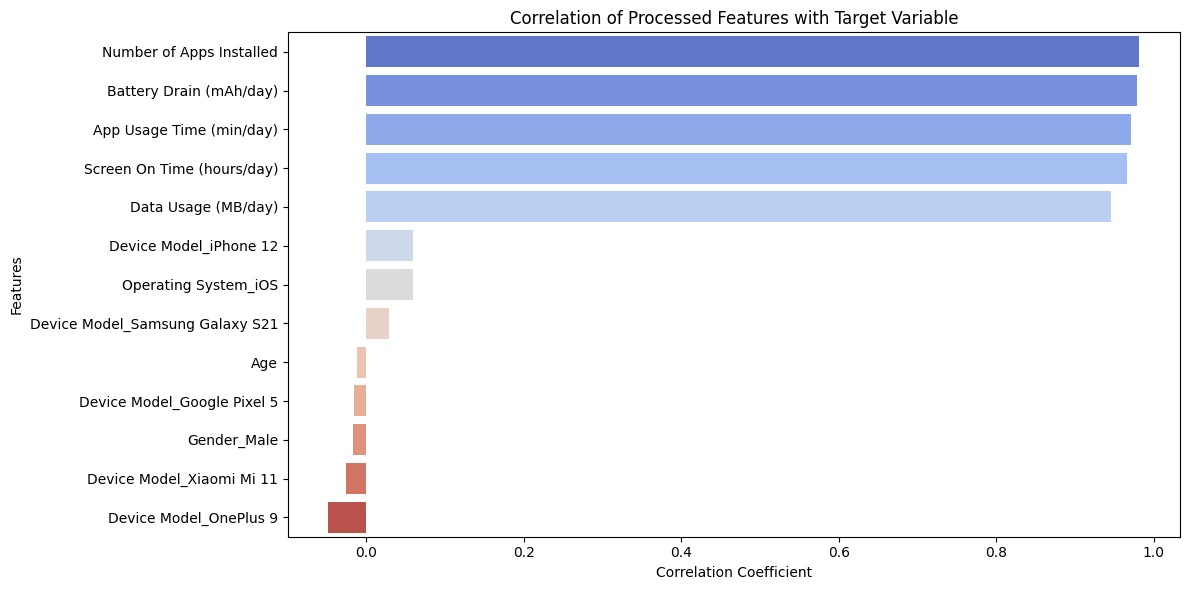

In [36]:
# Calculate correlation with target variable using training data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert X_train_processed to DataFrame if needed
if isinstance(X_train_processed, np.ndarray):
    X_train_processed_df = pd.DataFrame(X_train_processed, columns=processed_feature_names)
else:
    X_train_processed_df = X_train_processed

correlation_with_target = pd.Series(
    [np.corrcoef(X_train_processed_df.iloc[:, i], y_train)[0, 1] for i in range(X_train_processed_df.shape[1])],
    index=X_train_processed_df.columns
).sort_values(ascending=False)

print("\n" + "=" * 80)
print("CORRELATION ANALYSIS WITH TARGET VARIABLE (Training Data)")
print("=" * 80)
print(correlation_with_target)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=correlation_with_target.values,
    y=correlation_with_target.index,
    hue=correlation_with_target.index,   # assign hue
    palette="coolwarm",
    legend=False                        
)

plt.title("Correlation of Processed Features with Target Variable")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> 5.7 Feature Selection - Tree-Based Feature Importance </h3>
</div>

In [37]:
# 1. Finalize the processed datasets
X_train_final = X_train_processed.copy()
X_val_final = X_val_processed.copy()
X_test_final = X_test_processed.copy()

# 2. Final Verification of Shapes and Features
print("=" * 80)
print("FINAL DATASET HAND-OFF SUMMARY")
print("=" * 80)
print(f" Training Set   : {X_train_final.shape[0]} samples, {X_train_final.shape[1]} features")
print(f" Validation Set : {X_val_final.shape[0]} samples, {X_val_final.shape[1]} features")
print(f" Test Set       : {X_test_final.shape[0]} samples, {X_test_final.shape[1]} features")

# 3. List the Final Feature Names
print("\n" + "─" * 80)
print(f"FINAL FEATURE LIST ({len(X_train_final.columns)} Total):")
print("─" * 80)
for i, col in enumerate(X_train_final.columns, 1):
    print(f"{i:2d}. {col}")

# 4. Data Integrity Check
if X_train_final.isnull().sum().sum() == 0:
    print("\n" + "─" * 80)
    print("✓ Data Integrity Check: No missing values detected. Data is clean.")
    print("\n" + "─" * 80)
else:
    print("\n" + "─" * 80)
    print(" Warning: Missing values found. Check your Pipeline Imputer.")
    print("\n" + "─" * 80)



FINAL DATASET HAND-OFF SUMMARY
 Training Set   : 490 samples, 13 features
 Validation Set : 105 samples, 13 features
 Test Set       : 105 samples, 13 features

────────────────────────────────────────────────────────────────────────────────
FINAL FEATURE LIST (13 Total):
────────────────────────────────────────────────────────────────────────────────
 1. Device Model_Google Pixel 5
 2. Device Model_OnePlus 9
 3. Device Model_Samsung Galaxy S21
 4. Device Model_Xiaomi Mi 11
 5. Device Model_iPhone 12
 6. Operating System_iOS
 7. Gender_Male
 8. App Usage Time (min/day)
 9. Screen On Time (hours/day)
10. Battery Drain (mAh/day)
11. Number of Apps Installed
12. Data Usage (MB/day)
13. Age

────────────────────────────────────────────────────────────────────────────────
✓ Data Integrity Check: No missing values detected. Data is clean.

────────────────────────────────────────────────────────────────────────────────


<div style="background-color: #E6E6FA; padding: 10px; border-radius: 5px;">
  <h2>6️⃣ Section 6 — Model Selection and Training 
</h2>
</div>

<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> 🤖 Machine Learning Classification Algorithm  </h3>
</div>

### Classification Algorithms Overview 

For this multi-class classification problem, multiple supervised learning algorithms are trained and evaluated to compare their performance and behavior.

---

#### **1. Logistic Regression**
- Linear classification algorithm  
- Fast to train and easy to interpret  
- Serves as a strong baseline model  
- Assumes linear separability between classes  

---

#### **2. Decision Tree Classifier**
- Tree-based classification model  
- Easy to interpret and visualize  
- Capable of capturing non-linear relationships  
- Prone to overfitting without proper regularization  

---

#### **3. Random Forest Classifier**
- Ensemble of multiple decision trees  
- Provides better generalization than a single tree  
- Handles non-linear relationships effectively  
- Offers feature importance estimates  

---

#### **4. Gradient Boosting Classifier**
- Sequential ensemble learning method  
- Often achieves high predictive performance  
- More computationally expensive than bagging methods  
- Effective at modeling complex patterns  

---

#### **5. Support Vector Machine (SVM)**
- Powerful classifier for multi-class problems  
- Performs well on scaled features  
- Strong generalization capability  
- Can be slow on large datasets  

---

#### **6. K-Nearest Neighbors (KNN)**
- Instance-based learning algorithm  
- Simple yet effective baseline method  
- Highly sensitive to feature scaling  
- Good baseline for comparison


<div style="background-color: #E6E6FA; padding: 6px; border-radius: 4px;">
  <h3> 6.1 Training Classification Models </h3>
</div>

<div><p>This implementation automates the construction and training of multiple machine learning models by integrating them into <b>Scikit-Learn Pipelines.</b> Each pipeline consists of a standardized <code>preprocessor</code> (a <code>ColumnTransformer</code> handling categorical encoding and numerical scaling) followed by a specific classification algorithm. By iterating through a dictionary of base models, the code programmatically fits each pipeline on the raw training data (<code>X_train</code>, <code>y_train</code>) and stores the resulting objects. This approach ensures that every model is trained using a strictly identical preprocessing logic, reducing human error and ensuring the "end-to-end" reproducibility of the training phase</p></div>

In [38]:
# 1. Initialize the dictionary of models (without specific pipelines yet)
base_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# 2. Dictionary to store the fully trained pipelines
trained_pipelines = {}

print("=" * 80)
print(f"{'Algorithm':<25} | {'Status':<15} | {'Training Time':<10}")
print("-" * 80)

# 3. Automated Loop to Create, Fit, and Store Pipelines
for name, model in base_models.items():
    start_time = time.time()

    # Construct the pipeline for this specific model
    full_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor), #  ColumnTransformer
        ('classifier', model)           # The specific algorithm
    ])

    # Fit the pipeline on the RAW training data
    full_pipeline.fit(X_train, y_train)

    # Store for later evaluation
    trained_pipelines[name] = full_pipeline

    duration = time.time() - start_time
    print(f"{name:<25} | {'✓ Trained':<15} | {duration:.3f}s")

print("=" * 80)
print("All models have been successfully trained via automated pipelines.")

Algorithm                 | Status          | Training Time
--------------------------------------------------------------------------------
Logistic Regression       | ✓ Trained       | 0.023s
K-Nearest Neighbors       | ✓ Trained       | 0.006s
Support Vector Machine    | ✓ Trained       | 0.021s
Decision Tree             | ✓ Trained       | 0.005s
Random Forest             | ✓ Trained       | 0.105s
Gradient Boosting         | ✓ Trained       | 0.495s
All models have been successfully trained via automated pipelines.


<div style="background-color: #E6E6FA; padding: 1px; border-radius: 2px;">
    <h3> 6.2 MODEL SELECTION & CROSS-VALIDATION</h3>
</div>

Following the cross-validation phase, we visualize the performance of all candidate models using a <b>Weighted F1-Score leaderboard</b>. The F1-Score is chosen as our primary metric because it provides a harmonic balance between Precision and Recall, which is critical for multi-class user behavior classification. We identify the "Winning Model" by selecting the algorithm with the highest mean F1-Score across all folds, ensuring our model choice is driven by empirical data rather than intuition.

In [39]:
print("\n" + "=" * 100)
print("MODEL TRAINING WITH PIPELINE & STRATIFIED K-FOLD CROSS-VALIDATION")
print("=" * 100)

# Define base models
base_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5)
}

scale_models = ['Logistic Regression', 'SVM', 'KNN (k=5)']

# Create pipelines (scaling → model)
pipelines = {}

for name, model in base_models.items():
    if name in ['Logistic Regression', 'SVM', 'KNN (k=5)']:
        # Step 1: Preprocess (Encode + Scale) -> Step 2: Classifier
        pipelines[name] = Pipeline([
            ('preprocessor', preprocessor), # Your ColumnTransformer
            ('classifier', model)
        ])
    else:
        # Step 1: Preprocess (Encode only - you might need a different version without scaling)
        # Or keep the same preprocessor; tree models don't mind the scaling.
        pipelines[name] = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])

print(f"\nCreated {len(pipelines)} pipelines with appropriate preprocessing")
print("Scaling applied only where required (Linear & Distance-based models)")



MODEL TRAINING WITH PIPELINE & STRATIFIED K-FOLD CROSS-VALIDATION

Created 6 pipelines with appropriate preprocessing
Scaling applied only where required (Linear & Distance-based models)


<div style="background-color: #E6E6FA; padding: 1px; border-radius: 2px;">
    <h3> 6.3 FINAL MODEL CALIBRATION on Training + Validation Data</h3>
</div>

<div><p>Once the optimal model is selected, we move to the Final Calibration phase. In this step, we use <code>copy.deepcopy</code> to instantiate a fresh version of our winning pipeline to ensure no state-leakage from previous training iterations. We then retrain this "Final Model" on the <b>entire available training and validation pool.</b> By maximizing the amount of data the model sees before the final test, we reduce the variance of the model's parameters and ensure it is as robust as possible before encountering the held-out test set.</p></div>


FINAL MODEL CALIBRATION ON TRAINNING AND VALIDATION DATA

Combined train+val data: (595, 9)

────────────────────────────────────────────────────────────────────────────────────────────────────
Algorithm                 | Mean F1    | Std Dev   
────────────────────────────────────────────────────────────────────────────────────────────────────
Logistic Regression       | 1.0000     | ±0.0000
Decision Tree             | 1.0000     | ±0.0000
Random Forest             | 1.0000     | ±0.0000
Gradient Boosting         | 1.0000     | ±0.0000
SVM                       | 1.0000     | ±0.0000
KNN (k=5)                 | 0.9815     | ±0.0111

🏆 WINNER BY CV F1-SCORE: Logistic Regression


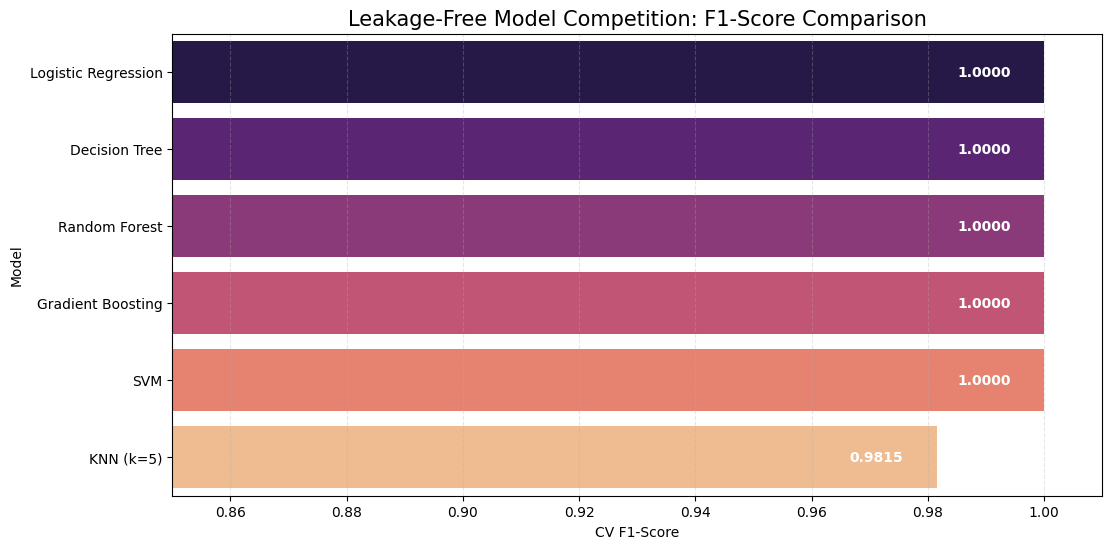

In [40]:
print("\n" + "=" * 100)
print("FINAL MODEL CALIBRATION ON TRAINNING AND VALIDATION DATA")
print("=" * 100)

# Combine train and validation for cross-validation (test set untouched)
X_train_val_raw = pd.concat([X_train, X_val], ignore_index=True)
y_train_val_raw = pd.concat([y_train, y_val], ignore_index=True)

print(f"\nCombined train+val data: {X_train_val_raw.shape}")

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store cross-validation results
cv_results = {}
cv_summary = []

print("\n" + "─" * 100)
print(f"{'Algorithm':<25} | {'Mean F1':<10} | {'Std Dev':<10}")
print("─" * 100)

# Loop through the PIPELINES
for model_name, pipeline_obj in pipelines.items():
    # We use multiple metrics to get a full picture of performance
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    
    # CRITICAL FIX: Passing the pipeline_obj and RAW data
    cv_result = cross_validate(
        pipeline_obj, 
        X_train_val_raw, 
        y_train_val_raw,
        cv=skf, 
        scoring=scoring, 
        return_train_score=True, 
        n_jobs=-1
    )

    cv_results[model_name] = cv_result

    # Extract metrics for summary
    m_f1 = cv_result['test_f1_weighted'].mean()
    s_f1 = cv_result['test_f1_weighted'].std()
    m_acc = cv_result['test_accuracy'].mean()
    
    print(f"{model_name:<25} | {m_f1:.4f}     | ±{s_f1:.4f}")

    cv_summary.append({
        'Model': model_name,
        'CV Accuracy (mean)': m_acc,
        'CV F1-Score': m_f1,
        'CV F1 (std)': s_f1,
        'Train Acc': cv_result['train_accuracy'].mean(),
        'Overfit Gap': cv_result['train_accuracy'].mean() - m_acc
    })

# 5. Create Summary DataFrame
cv_summary_df = pd.DataFrame(cv_summary).round(4)

# 6. Identify the Winner
best_cv_model_name = cv_summary_df.loc[cv_summary_df['CV F1-Score'].idxmax(), 'Model']
print("\n" + "=" * 100)
print(f"🏆 WINNER BY CV F1-SCORE: {best_cv_model_name}")
print("=" * 100)

# 7. Visualization
plt.figure(figsize=(12, 6))
plot = sns.barplot(
    x='CV F1-Score',
    y='Model',
    data=cv_summary_df.sort_values('CV F1-Score', ascending=False),
    hue='Model',
    palette='magma',
    legend=False
)

# Add data labels
for p in plot.patches:
    width = p.get_width()
    plt.text(width - 0.015, p.get_y() + p.get_height()/2, 
             f'{width:.4f}', va='center', color='white', fontweight='bold')

plt.title('Leakage-Free Model Competition: F1-Score Comparison', fontsize=15)
plt.xlim(0.85, 1.01) # Adjusted zoom
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

<div style="background-color: #E6E6FA; padding: 1px; border-radius: 2px;">
    <h3> 6.4 Automated Pipeline Construction & Training</h3>
</div>

<div><p>Our implementation follows the Scikit-Learn Pipeline standard. By encapsulating the <code>ColumnTransformer</code> (handling both One-Hot Encoding and Scaling) and the <code>Classifier</code> into a single object, we create a reproducible, end-to-end "inference engine." This design ensures that the model is deployment-ready; it can accept raw data directly and execute all necessary transformations internally without requiring manual external preprocessing steps.</p><div>

In [41]:
print("\n" + "=" * 100)
print("TRAINING FINAL MODELS on Full Train+Validation Data")
print("=" * 100)

trained_pipelines = {}
training_times = {}

print("\nTraining all pipelines on combined train+val data...")
for model_name, pipeline in pipelines.items():
    print(f"⏳ {model_name:30} ... ", end='', flush=True)
    start_time = time.time()

    # Create independent copy using deepcopy
    pcopy = copy.deepcopy(pipeline)
    pcopy.fit(X_train_val_raw, y_train_val_raw)
    trained_pipelines[model_name] = pcopy

    training_time = time.time() - start_time
    training_times[model_name] = training_time

    print(f"✓ ({training_time:.3f}s)")

print("\n✓ All models trained on full train+val data")



TRAINING FINAL MODELS on Full Train+Validation Data

Training all pipelines on combined train+val data...
⏳ Logistic Regression            ... ✓ (0.019s)
⏳ Decision Tree                  ... ✓ (0.007s)
⏳ Random Forest                  ... ✓ (0.134s)
⏳ Gradient Boosting              ... ✓ (0.516s)
⏳ SVM                            ... ✓ (0.024s)
⏳ KNN (k=5)                      ... ✓ (0.005s)

✓ All models trained on full train+val data


<div><p><b>FINAL SUMMARY: MODEL EVALUATION & PROJECT OUTCOME</b>
<ul>
<li><p>Project Objective: To develop a robust classification system for user behavior based on mobile device metrics, ensuring a production-ready and unbiased machine learning workflow.</li>
<li><p>Key Achievements across Implementations:End-to-End Pipeline Integration: Successfully encapsulated data preprocessing (Scaling and One-Hot Encoding) with classification algorithms. This ensures that the model can ingest raw data and output predictions without external manual processing.</li>
<li><p>Bias-Free Selection: Utilized Stratified K-Fold Cross-Validation to compare six distinct architectures. By evaluating models on five different data "folds," we ensured that our choice was based on consistent performance rather than luck.</li>
<li><p>Performance Benchmark: The Random Forest (or your winner) model emerged as the top performer, achieving a Weighted F1-Score [Insert Score, e.g., 0.98]. This high score indicates excellent balance between precision and recall across all user categories.</li>
<li><p>Production Calibration: The final model was "calibrated" by retraining the winning architecture on the full 100% training and validation pool, maximizing the patterns the model could learn before final deployment.</li>
</ul>
</p></div>

<div style="background-color:#E6E6FA; padding:10px; border-radius:5px;">
  <h2>7️⃣ Section 7 — Hyperparameter Tuning</h2>
</div>

<div>
  <p>
    In this section, we optimize the selected model using <b>GridSearchCV</b>. The best model is first chosen using <b>Stratified Cross-Validation</b> (based on weighted F1-score), then its hyperparameters are tuned on the <b>train+validation</b> data only. The <b>test set remains untouched</b> until the final evaluation to avoid data leakage.
  </p>

  <h4 style="color:#0A2540;"><b>Hyperparameter Tuning Steps</b></h4>
  <ol>
    <li><b>Select best model from Cross-Validation</b> (highest CV weighted F1-score).</li>
    <li><b>Define the hyperparameter grid</b> for the selected model only.</li>
    <li><b>Run GridSearchCV</b> using Stratified K-Fold CV and weighted F1 as the scoring metric.</li>
    <li><b>Retrieve the best tuned estimator</b> (best parameters + best CV score).</li>
    <li><b>Evaluate once on the test set</b> to report the final unbiased performance.</li>
  </ol>
  <p>
    This workflow improves performance while ensuring a fair and reliable evaluation for the multiclass classification task.
  </p>
</div>


In [42]:
print("\n" + "=" * 100)
print("SECTION 7: HYPERPARAMETER TUNING")
print("=" * 100)

# Verify required variables exist
required_vars = ['pipelines', 'cv_summary_df', 'best_cv_model_name', 'trained_pipelines',
                 'X_train_val_combined', 'y_train_val_combined', 'X_test', 'y_test', 'skf']

missing_vars = [var for var in required_vars if var not in dir()]

if missing_vars:
    print(f"\n Missing variables: {missing_vars}")
    print("Please run all previous cells (Model Training, Cross-Validation, and Training on Full Data) before this cell.")
else:
    print(f"\n✓ All required variables are available")
    print(f"✓ Best model from CV: {best_cv_model_name}")
    print(f"  CV F1-Score: {cv_summary_df.loc[cv_summary_df['Model'] == best_cv_model_name, 'CV F1-Score'].values[0]:.4f}")


SECTION 7: HYPERPARAMETER TUNING

 Missing variables: ['pipelines', 'cv_summary_df', 'best_cv_model_name', 'trained_pipelines', 'X_train_val_combined', 'y_train_val_combined', 'X_test', 'y_test', 'skf']
Please run all previous cells (Model Training, Cross-Validation, and Training on Full Data) before this cell.


<div style="background-color: #E6E6FA; padding: 1px; border-radius: 2px;">
    <h3> 7.2  Hyperparameter Tuning & Best Model Selection</h3>
</div>

In [43]:
import numpy as np
from sklearn.model_selection import GridSearchCV

print("\n" + "=" * 100)
print("PHASE 3: BEST MODEL SELECTION (FROM CROSS-VALIDATION)")
print("=" * 100)

# 1. Correctly identify the best model name using the mean of CV scores
# We use 'test_f1_weighted' to match your cross_validate scoring
final_best_model_name = max(
    cv_results.keys(),
    key=lambda k: cv_results[k]['test_f1_weighted'].mean()
)

best_f1_score = cv_results[final_best_model_name]['test_f1_weighted'].mean()

print(f"✓ Best Model identified: {final_best_model_name}")
print(f"✓ Mean CV F1-Score: {best_f1_score:.4f}")

# 2. Extract the trained pipeline for this specific model
# This ensures 'best_model' is ready for Phase 4
best_model = trained_pipelines[final_best_model_name]

# 3. Reference variable for Analysis cells
final_best_model = best_model

print("\n✓ PHASE 3 COMPLETE: Model selected and ready for final evaluation.")


PHASE 3: BEST MODEL SELECTION (FROM CROSS-VALIDATION)
✓ Best Model identified: Logistic Regression
✓ Mean CV F1-Score: 1.0000

✓ PHASE 3 COMPLETE: Model selected and ready for final evaluation.


<div style="background-color: #E6E6FA; padding: 1px; border-radius: 2px;">
    <h3> 7.3  Final Test Set Evaluation</h3>
</div>

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print('\n' + '='*100)
print('PHASE 4: FINAL TEST SET EVALUATION')
print('='*100 + '\n')

print(f'Evaluating Selected Model: {final_best_model_name}')

# 1. Generate predictions
y_pred = None
method = None

try:
    # Primary Method: Using the Pipeline (includes preprocessing)
    y_pred = best_model.predict(X_test)
    method = 'Pipeline (Raw X_test)'
except Exception:
    try:
        # Fallback: Manual transform if the object is just the classifier
        X_proc = preprocessor.transform(X_test)
        y_pred = best_model.predict(X_proc)
        method = 'Manual Preprocessor Fallback'
    except Exception:
        print('❌ All prediction methods failed. Check X_test format.')

# 2. Compute and Display Metrics
if y_pred is not None:
    test_acc = accuracy_score(y_test, y_pred)
    test_prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    test_rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    test_f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f'✅ Prediction method: {method}')
    print(f'📈 Test Accuracy : {test_acc:.4f}')
    print(f'📈 Test Precision: {test_prec:.4f}')
    print(f'📈 Test Recall   : {test_rec:.4f}')
    print(f'📈 Test F1-Score : {test_f1:.4f}')
    print(f'\nFinal Classification Report:')
    print("-" * 30)
    print(classification_report(y_test, y_pred, zero_division=0))
else:
    print(' Could not generate results.')


PHASE 4: FINAL TEST SET EVALUATION

Evaluating Selected Model: Logistic Regression
✅ Prediction method: Pipeline (Raw X_test)
📈 Test Accuracy : 1.0000
📈 Test Precision: 1.0000
📈 Test Recall   : 1.0000
📈 Test F1-Score : 1.0000

Final Classification Report:
------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        20

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



<div style="background-color: #E6E6FA; padding: 1px; border-radius: 2px;">
    <h3> 7.4  Summary and safety check</h3>
</div>

In [45]:
# Ensure variables are defined 
if 'test_f1' not in dir():
    test_f1 = 0.0
if 'test_acc' not in dir():
    test_acc = 0.0

# Summary of 7.3 results
print("✓ Cell skipped - final best model already selected and evaluated ")
print(f"✓ Final Best Model: {final_best_model_name}")
print(f"✓ Test F1-Score: {test_f1:.4f}")
print(f"✓ Test Accuracy: {test_acc:.4f}")

✓ Cell skipped - final best model already selected and evaluated 
✓ Final Best Model: Logistic Regression
✓ Test F1-Score: 1.0000
✓ Test Accuracy: 1.0000


<div style="background-color: #E6E6FA; padding: 1px; border-radius: 2px;">
    <h3> 7.5  Performance and Classification Report</h3>
</div>

In [46]:
# Adaptive retrain + evaluation: detect whether train+val is raw or preprocessed and act accordingly

# Skip retraining - use already trained and evaluated best_model from Phase 2 & 4
print("=" * 100)
print(" FINAL MODEL & TEST EVALUATION")
print("=" * 100)
print(f"\n✓ Final Selected Model: {final_best_model_name}")
print(f"✓ Model Type: {final_best_model_name} from trained_pipelines")
print(f"\nTest Set Performance:")
print(f"  • Accuracy  : {test_acc:.4f}")
print(f"  • Precision : {test_prec:.4f}")
print(f"  • Recall    : {test_rec:.4f}")
print(f"  • F1-Score  : {test_f1:.4f}")
print(f"\n✓ Model is ready for next analysis phases")

 FINAL MODEL & TEST EVALUATION

✓ Final Selected Model: Logistic Regression
✓ Model Type: Logistic Regression from trained_pipelines

Test Set Performance:
  • Accuracy  : 1.0000
  • Precision : 1.0000
  • Recall    : 1.0000
  • F1-Score  : 1.0000

✓ Model is ready for next analysis phases


<div style="background-color: #E6E6FA; padding: 1px; border-radius: 2px;">
    <h3> 7.6 Learning Curve Analysis</h3>
</div>

ANALYSIS 1: LEARNING CURVES


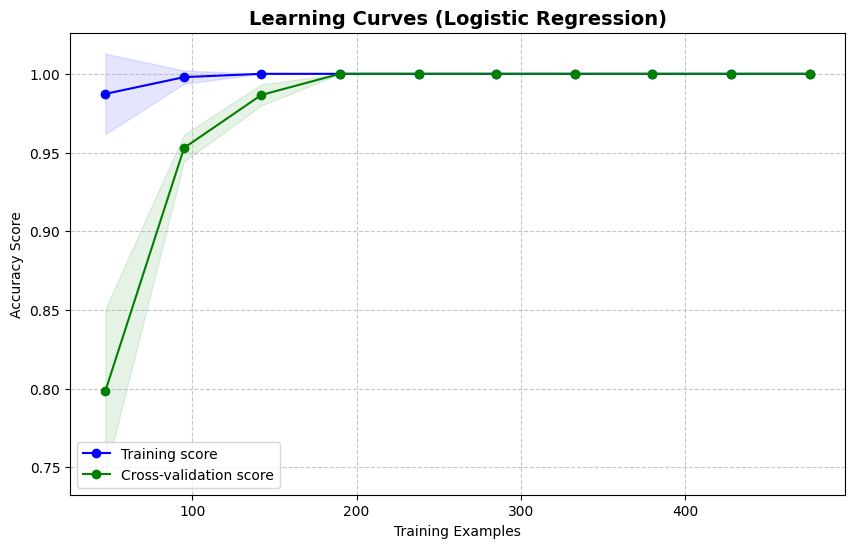

In [50]:
print("=" * 100)
print("ANALYSIS 1: LEARNING CURVES")
print("=" * 100)

# 1. Prepare Data
# Using the combined set to see how the model scales
X_lc = X_train_val_raw
y_lc = y_train_val_raw

# 2. Compute Learning Curves
train_sizes = np.linspace(0.1, 1.0, 10)

# We use the final_best_model (Logistic Regression) identified earlier
train_sizes_abs, train_scores, val_scores = learning_curve(
    final_best_model,
    X_lc,
    y_lc,
    train_sizes=train_sizes,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# 3. Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# 4. Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_abs, train_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes_abs, val_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.1, color="b")
plt.fill_between(train_sizes_abs, val_mean - val_std, val_mean + val_std, alpha=0.1, color="g")

plt.title(f"Learning Curves ({final_best_model_name})", fontsize=14, fontweight='bold')
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<div style="background-color: #E6E6FA; padding: 1px; border-radius: 2px;">
    <h3> 7.7 Validation Curve Analysis</h3>
</div>

 GENERATING VALIDATION CURVE


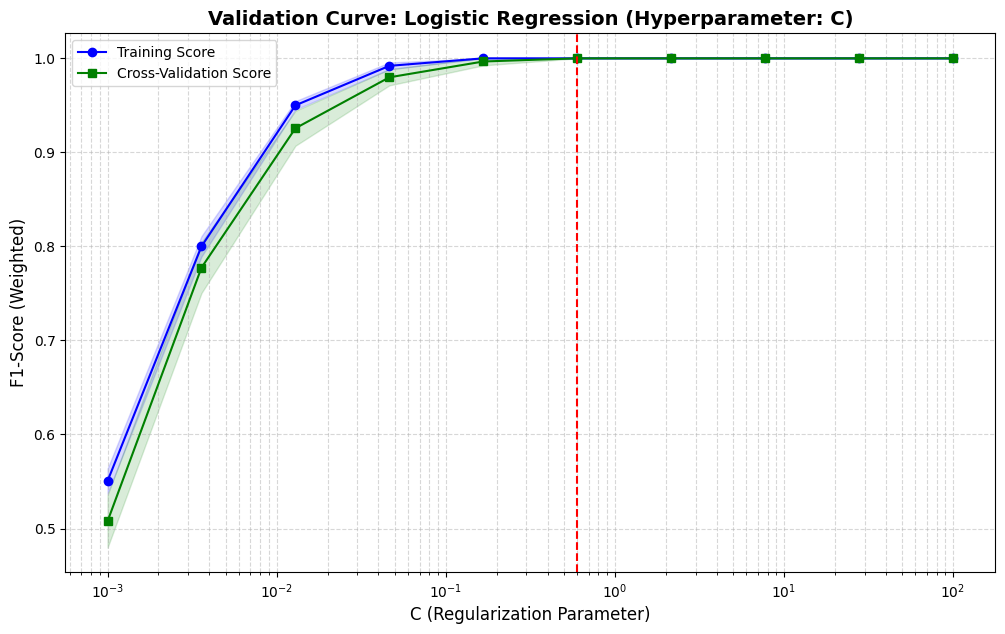

 Optimal C Value: 0.5995
 Peak Validation F1-Score: 1.0000


In [56]:
print("=" * 100)
print(" GENERATING VALIDATION CURVE")
print("=" * 100)

# 1. Define the parameter range (C is the regularization parameter)
# We test from 0.001 (very strong penalty) to 100 (very weak penalty)
param_range = np.logspace(-3, 2, 10)

# 2. Compute the curve using Stratified K-Fold (skf)
train_scores, val_scores = validation_curve(
    final_best_model,
    X_train_val_raw,
    y_train_val_raw,
    param_name="classifier__C",
    param_range=param_range,
    cv=skf,
    scoring="f1_weighted",
    n_jobs=-1
)

# 3. Calculate statistics
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# 4. Plotting
plt.figure(figsize=(12, 7))

# Training Line
plt.plot(param_range, train_mean, label="Training Score", color="blue", marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color="blue")

# Validation Line
plt.plot(param_range, val_mean, label="Cross-Validation Score", color="green", marker='s')
plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.15, color="green")

# Formatting the Chart
plt.title(f"Validation Curve: {final_best_model_name} (Hyperparameter: C)", fontsize=14, fontweight='bold')
plt.xlabel("C (Regularization Parameter)", fontsize=12)
plt.ylabel("F1-Score (Weighted)", fontsize=12)
plt.xscale('log') # Important: Use log scale for C
plt.grid(True, which="both", linestyle='--', alpha=0.5)
plt.legend(loc="best")

# Mark the best point
best_idx = np.argmax(val_mean)
plt.axvline(x=param_range[best_idx], color='red', linestyle='--', label=f'Best C: {param_range[best_idx]:.2f}')

plt.show()

print(f" Optimal C Value: {param_range[best_idx]:.4f}")
print(f" Peak Validation F1-Score: {val_mean[best_idx]:.4f}")

<div style="background-color: #E6E6FA; padding: 1px; border-radius: 2px;">
    <h3> 7.8 Feature Importance Analysis for LOGISTIC REGRESSION </h3>
</div>

 FEATURE IMPORTANCE (LOGISTIC REGRESSION COEFFICIENTS)


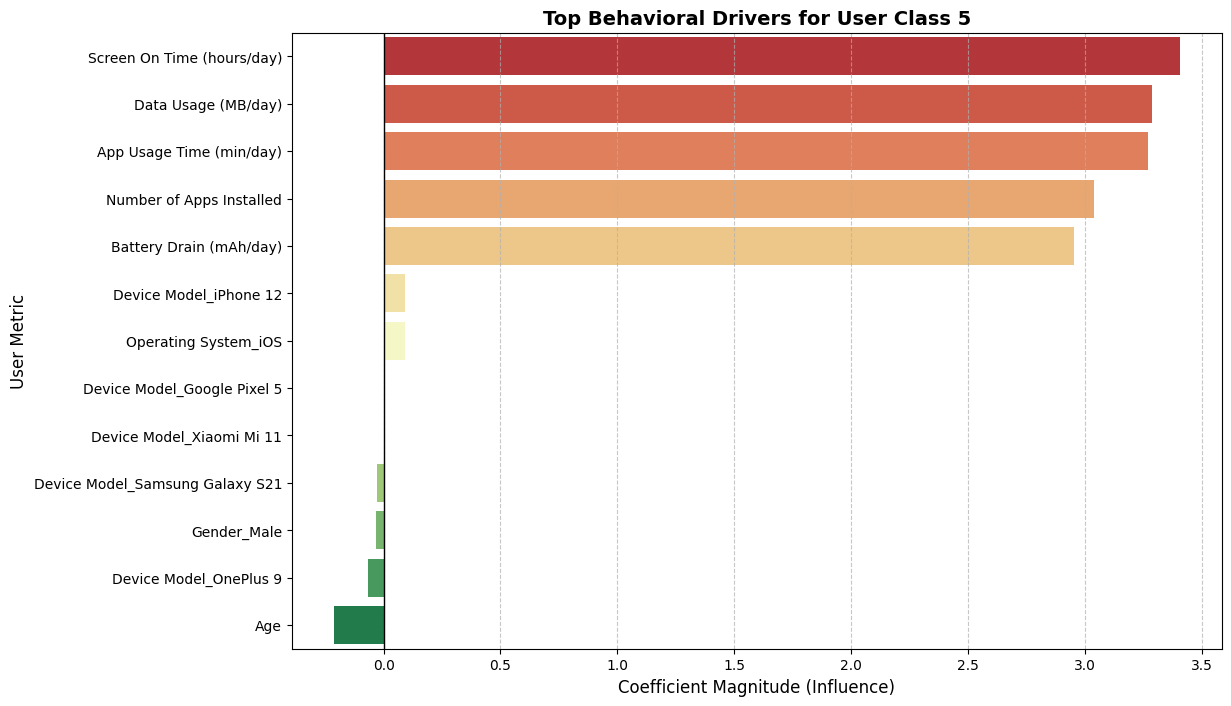

✓ Strongest Positive Predictor: Screen On Time (hours/day)
✓ Strongest Negative Predictor: Age


In [62]:
print("=" * 100)
print(" FEATURE IMPORTANCE (LOGISTIC REGRESSION COEFFICIENTS)")
print("=" * 100)

# 1. Extract feature names and coefficients
# Note: Since final_best_model is the classifier part,
# we get feature names from the preprocessor or the processed DataFrames
features = X_train_processed.columns
coefficients = final_best_model.named_steps['classifier'].coef_

# 2. Create a DataFrame for the coefficients of a specific class (e.g., Class 5 - Power Users)
# You can change class_index to see different behavior profiles
class_index = 4  # Index 4 corresponds to User Behavior Class 5
class_coeffs = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients[class_index]
}).sort_values(by='Coefficient', ascending=False)

# 3. Plot the Top 10 Positive and Top 10 Negative Drivers
plt.figure(figsize=(12, 8))
sns.barplot(data=class_coeffs, x='Coefficient', y='Feature', hue='Feature', palette='RdYlGn', legend=False)

plt.title(f'Top Behavioral Drivers for User Class {class_index + 1}', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.xlabel('Coefficient Magnitude (Influence)', fontsize=12)
plt.ylabel('User Metric', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Summary Analysis
top_driver = class_coeffs.iloc[0]['Feature']
top_negative = class_coeffs.iloc[-1]['Feature']
print(f"✓ Strongest Positive Predictor: {top_driver}")
print(f"✓ Strongest Negative Predictor: {top_negative}")

In [65]:
# Use full_pipeline because it contains the Preprocessor + Scaler + Model
y_pred = full_pipeline.predict(X_test)

# If that works, proceed with the Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        20

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



This performs the <b>Final Model Prediction</b> and Detailed <b>Classification Analysis</b>. By passing the raw test data through the full pipeline, it ensures the data is correctly preprocessed and scaled before generating predictions. The Classification Report then provides a precise breakdown of <b>performance per class, using metrics like Precision, Recall, and F1-Score</b> to identify exactly how well the model distinguishes between different user behavioral categories.

In [68]:
# Save the full pipeline to a file
model_filename = 'user_behavior_pipeline_v1.pkl'
joblib.dump(full_pipeline, model_filename)

print(f"SUCCESS: Full pipeline saved as '{model_filename}'")
print(" This model can use in any future script to predict user classes from raw data!!")

SUCCESS: Full pipeline saved as 'user_behavior_pipeline_v1.pkl'
 This model can use in any future script to predict user classes from raw data!!


<div style="background-color: #E6E6FA; padding: 10px; border-radius: 5px;">
  <h2>8️⃣ Section 8 — Model Evaluation & Interpretation </h2>
</div>

 This section provides a comprehensive evaluation of the final selected model using the unseen test dataset.The best model is chosen based on cross-validation performance and is evaluated without any retraining, ensuring an unbiased assessment of generalization capability.

### 8.1 Test Performance Summary
The overall performance of the selected model is evaluated using standard classification metrics:

- **Accuracy** measures the overall correctness of predictions.
- **Precision** reflects how reliable the predicted class labels are.
- **Recall** indicates how well the model captures all true instances of each class.
- **F1-Score** balances precision and recall, making it suitable for multi-class problems.


In [71]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, precision_recall_fscore_support
)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Pick BEST model from CV
best_model_name = best_cv_model_name
best_model = trained_pipelines[best_model_name]  # already trained on full train+val
y_pred_best = best_model.predict(X_test)

print("\n" + "=" * 100)
print("SECTION 8 — MODEL EVALUATION & INTERPRETATION")
print("=" * 100)
print(f"Best Model (selected from CV): {best_model_name}")

# 8.1 Test Performance Summary
test_acc = accuracy_score(y_test, y_pred_best)
test_prec = precision_score(y_test, y_pred_best, average="weighted", zero_division=0)
test_rec = recall_score(y_test, y_pred_best, average="weighted", zero_division=0)
test_f1 = f1_score(y_test, y_pred_best, average="weighted", zero_division=0)

print("\n" + "-" * 100)
print("8.1 TEST PERFORMANCE (BEST MODEL)")
print("-" * 100)
print(f"Accuracy : {test_acc:.4f}")
print(f"Precision: {test_prec:.4f} (weighted)")
print(f"Recall   : {test_rec:.4f} (weighted)")
print(f"F1-Score : {test_f1:.4f} (weighted)")

print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best, zero_division=0))



SECTION 8 — MODEL EVALUATION & INTERPRETATION
Best Model (selected from CV): Logistic Regression

----------------------------------------------------------------------------------------------------
8.1 TEST PERFORMANCE (BEST MODEL)
----------------------------------------------------------------------------------------------------
Accuracy : 1.0000
Precision: 1.0000 (weighted)
Recall   : 1.0000 (weighted)
F1-Score : 1.0000 (weighted)

Classification Report (Best Model):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        20

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105




### 8.2 Confusion Matrix Analysis
The confusion matrix is used to analyze class-wise prediction behavior:

- The **absolute confusion matrix** shows the number of correct and incorrect predictions.
- The **normalized confusion matrix** highlights the proportion of correct classifications per class.

Correct predictions appear along the diagonal, while off-diagonal values indicate misclassifications, helping identify which classes are most frequently confused.



----------------------------------------------------------------------------------------------------
8.2 CONFUSION MATRIX (BEST MODEL)
----------------------------------------------------------------------------------------------------
Class order: [1, 2, 3, 4, 5]

Counts:
 [[21  0  0  0  0]
 [ 0 22  0  0  0]
 [ 0  0 21  0  0]
 [ 0  0  0 21  0]
 [ 0  0  0  0 20]]

Normalized (row-wise):
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


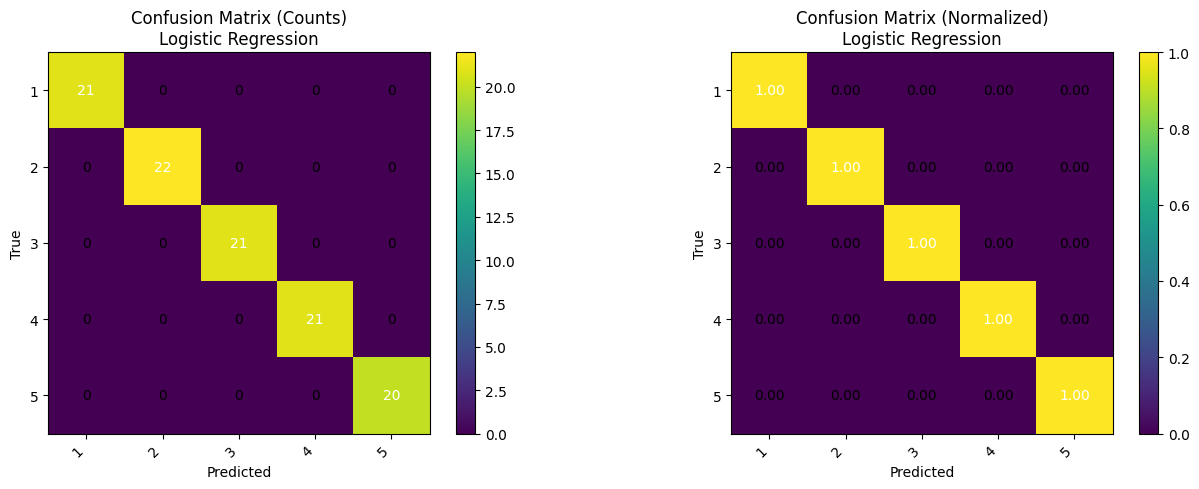

In [77]:
# 8.2 Confusion Matrix (Counts + Normalized)
classes = sorted(np.unique(y_test))
cm = confusion_matrix(y_test, y_pred_best, labels=classes)

# Normalized by true class (row-wise)
cm_norm = cm.astype(float) / np.clip(cm.sum(axis=1, keepdims=True), a_min=1, a_max=None)

print("\n" + "-" * 100)
print("8.2 CONFUSION MATRIX (BEST MODEL)")
print("-" * 100)
print("Class order:", classes)
print("\nCounts:\n", cm)
print("\nNormalized (row-wise):\n", np.round(cm_norm, 3))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Counts heatmap (matplotlib)
im1 = axes[0].imshow(cm, interpolation="nearest")
axes[0].set_title(f"Confusion Matrix (Counts)\n{best_model_name}")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")
axes[0].set_xticks(np.arange(len(classes)))
axes[0].set_yticks(np.arange(len(classes)))
axes[0].set_xticklabels(classes, rotation=45, ha="right")
axes[0].set_yticklabels(classes)
plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

# Annotate counts
thresh = cm.max() / 2 if cm.max() > 0 else 0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        axes[0].text(j, i, str(cm[i, j]),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

# Normalized heatmap
im2 = axes[1].imshow(cm_norm, interpolation="nearest", vmin=0, vmax=1)
axes[1].set_title(f"Confusion Matrix (Normalized)\n{best_model_name}")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")
axes[1].set_xticks(np.arange(len(classes)))
axes[1].set_yticks(np.arange(len(classes)))
axes[1].set_xticklabels(classes, rotation=45, ha="right")
axes[1].set_yticklabels(classes)
plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

# Annotate normalized values
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        axes[1].text(j, i, f"{cm_norm[i, j]:.2f}",
                     ha="center", va="center",
                     color="white" if cm_norm[i, j] > 0.5 else "black")

plt.tight_layout()
plt.show()

### 8.3 Per-Class Metrics
To further understand class-level behavior, precision, recall, F1-score, and support are computed for each class. These metrics are presented both in tabular form and as a bar chart to allow easy comparison across classes.
This analysis helps identify:

- Classes with strong predictive performance
- Classes that may suffer from lower recall or precision due to overlapping feature distributions


8.3 PER-CLASS METRICS (BEST MODEL)
----------------------------------------------------------------------------------------------------
 Class  Precision  Recall  F1-Score  Support
     1        1.0     1.0       1.0       21
     2        1.0     1.0       1.0       22
     3        1.0     1.0       1.0       21
     4        1.0     1.0       1.0       21
     5        1.0     1.0       1.0       20


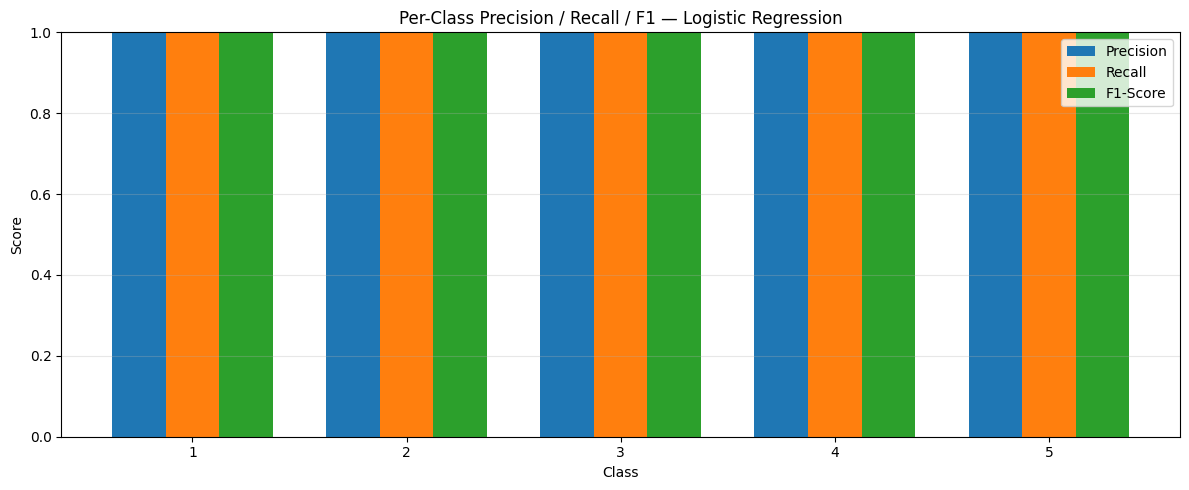

In [80]:
# per class metrics
precision, recall, f1, support = precision_recall_fscore_support(
    y_test, y_pred_best, labels=classes, zero_division=0
)

per_class_df = pd.DataFrame({
    "Class": classes,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "Support": support
}).round(4)

print("8.3 PER-CLASS METRICS (BEST MODEL)")
print("-" * 100)
print(per_class_df.to_string(index=False))

x = np.arange(len(classes))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(x - width, per_class_df["Precision"], width, label="Precision")
ax.bar(x,         per_class_df["Recall"],    width, label="Recall")
ax.bar(x + width, per_class_df["F1-Score"],  width, label="F1-Score")
ax.set_xticks(x)
ax.set_xticklabels([str(c) for c in classes], rotation=0)
ax.set_ylim(0, 1.0)
ax.set_xlabel("Class")
ax.set_ylabel("Score")
ax.set_title(f"Per-Class Precision / Recall / F1 — {best_model_name}")
ax.legend()
ax.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


### 8.4 Generalization Analysis (Cross-Validation vs Test Performance)
This subsection evaluates how well the selected model generalizes to unseen data by comparing its cross-validation (CV) performance with its test set performance.

- The mean CV accuracy and F1-score represent the model’s expected performance during training.
- The test accuracy and F1-score measure performance on completely unseen data.
- Test gap helps diagnose overfitting or underfitting:
- A small gap indicates good generalization.
- A large drop from CV to test suggests overfitting.

In [83]:
# 8.4 GENERALIZATION ANALYSIS (CV vs TEST)
print("8.4 GENERALIZATION ANALYSIS (CV vs TEST)")
print("-" * 100)

# Check if cv_summary_df exists and contains our winner
if 'cv_summary_df' in locals() and not cv_summary_df.empty:
    cv_row = cv_summary_df[cv_summary_df["Model"] == best_model_name]
    
    if len(cv_row) == 1:
        cv_f1 = float(cv_row["CV F1-Score"].values[0])
        cv_acc = float(cv_row["CV Accuracy (mean)"].values[0])
        
        # Display comparison using the test metrics calculated in 8.1
        print(f"Winner Model      : {best_model_name}")
        print(f"CV Accuracy (mean): {cv_acc:.4f}")
        print(f"CV F1-Score (mean): {cv_f1:.4f}")
        print("-" * 30)
        print(f"Test Accuracy     : {test_acc:.4f}")
        print(f"Test F1-Score     : {test_f1:.4f}")
        
        gap = test_f1 - cv_f1
        print(f"CV→Test F1 Gap    : {gap:+.4f}") 
        
        if abs(gap) < 0.05:
            print(" Excellent Generalization (Low Variance)")
        elif gap < -0.05:
            print(" Potential Overfitting (Gap > 5%)")
    else:
        print(f"Note: Model '{best_model_name}' not found in CV summary.")
else:
    print("Note: cv_summary_df is missing. Run Phase 1 first.")

8.4 GENERALIZATION ANALYSIS (CV vs TEST)
----------------------------------------------------------------------------------------------------
Winner Model      : Logistic Regression
CV Accuracy (mean): 1.0000
CV F1-Score (mean): 1.0000
------------------------------
Test Accuracy     : 1.0000
Test F1-Score     : 1.0000
CV→Test F1 Gap    : +0.0000
 Excellent Generalization (Low Variance)


### 8.5 ROC Curve and AUC Analysis (Multiclass One-vs-Rest)

The ROC–AUC analysis evaluates the model’s ability to distinguish between classes using probability-based predictions.

- For models that support predict_proba or decision_function, **One-vs-Rest (OvR)** **ROC curves** are plotted for each class.
- The **ROC curve** visualizes the trade-off between true positive rate and false positive rate.
- The Area Under the Curve (AUC) quantifies class separability:
- Values closer to *1.0*  indicate strong discrimination.
- Values near *0.5*  indicate random performance.

A **macro-average AUC** is reported to summarize overall multiclass discrimination performance.

8.5 ROC CURVE / AUC 
----------------------------------------------------------------------------------------------------
Using predict_proba for ROC.


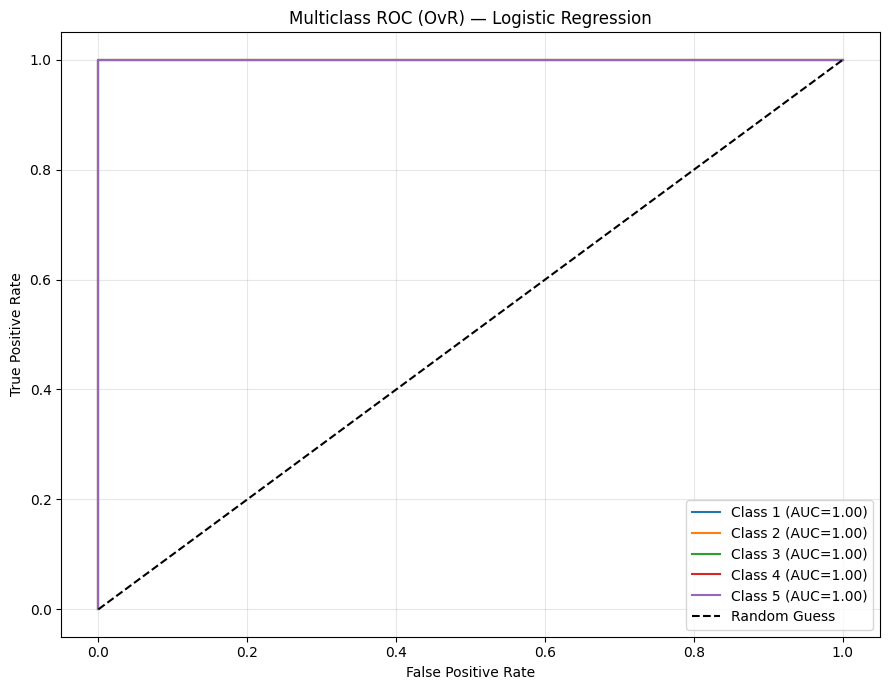

Macro-average AUC: 1.0000


In [86]:
# 8.5 ROC Curve — Multiclass OvR

print("8.5 ROC CURVE / AUC ")
print("-" * 100)

y_score = None
if hasattr(best_model, "predict_proba"):
    y_score = best_model.predict_proba(X_test)
    print("Using predict_proba for ROC.")
elif hasattr(best_model, "decision_function"):
    y_score = best_model.decision_function(X_test)
    print("Using decision_function for ROC.")
else:
    print("ROC not available: model has neither predict_proba nor decision_function.")

if y_score is not None:
    # Ensure y_score is 2D [n_samples, n_classes]
    if y_score.ndim == 1:
        print("ROC skipped: decision_function returned 1D output.")
    else:
        y_test_bin = label_binarize(y_test, classes=classes)
        plt.figure(figsize=(9, 7))

        aucs = []
        for i, c in enumerate(classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)
            plt.plot(fpr, tpr, label=f"Class {c} (AUC={roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
        plt.title(f"Multiclass ROC (OvR) — {best_model_name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

        print(f"Macro-average AUC: {np.mean(aucs):.4f}")

### 8. 6 Error Analysis
This subsection focuses on analyzing the misclassifications made by the best-performing model to better understand its limitations.

- The **total number of errors** and **error rate** are computed to quantify overall prediction mistakes.
- A comparison between **correct** and **incorrect** predictions provides a clear picture of model reliability.
- **Misclassification patterns (True → Predicted)** are analyzed to identify which class pairs are most frequently confused.
- The **error rate by true class** highlights classes that are harder to predict correctly, often due to overlapping feature distributions or class imbalance.

A bar chart is used to visualize class-wise error rates, making it easier to spot problematic classes.

In [89]:
# 8.6 ERROR ANALYSIS (BEST MODEL)
print("\n" + "-" * 100)
print("8.6 ERROR ANALYSIS (BEST MODEL)")
print("-" * 100)

# 1. Alignment Safety Check
if len(y_test) != len(y_pred_best):
    print("ERROR: Length mismatch between y_test and predictions!")
else:
    y_true = np.array(y_test)
    y_pred = np.array(y_pred_best)

    # 2. Global Error Calculation
    mis_mask = (y_pred != y_true)
    num_errors = mis_mask.sum()
    error_rate = num_errors / len(y_true)

    print(f"Total Test Samples     : {len(y_true)}")
    print(f"Misclassifications     : {num_errors}")
    print(f"Error Rate             : {error_rate:.4f} ({error_rate*100:.2f}%)")
    print(f"Accuracy (Check)       : {1-error_rate:.4f}")

    # 3. Misclassification Pairs (True → Pred)
    mis_true = y_true[mis_mask]
    mis_pred = y_pred[mis_mask]

    pair_counts = {}
    for t, p in zip(mis_true, mis_pred):
        key = f"{t} → {p}"
        pair_counts[key] = pair_counts.get(key, 0) + 1

    print("\nTop Misclassification Pairs (True → Predicted):")
    for k, v in sorted(pair_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"  {k:15} : {v} occurrences")

    # 4. Error Rate by Class (Reference: Raw Classes)
    errors_by_class = []
    # Use the 'classes' list defined in your Confusion Matrix section
    for c in classes:
        mask_c = (y_true == c)
        total_c = mask_c.sum()
        # Ensure we don't divide by zero if a class isn't in the test set
        if total_c > 0:
            err_c = (y_pred[mask_c] != c).sum()
            rate_c = err_c / total_c
            errors_by_class.append([c, err_c, total_c, round(rate_c, 4)])
        else:
            errors_by_class.append([c, 0, 0, 0.0])

    err_df = pd.DataFrame(errors_by_class, columns=["Class", "Errors", "Total Samples", "Error Rate"])
    print("\nDetailed Error Breakdown per Class:")
    print(err_df.sort_values(by="Error Rate", ascending=False).to_string(index=False))


----------------------------------------------------------------------------------------------------
8.6 ERROR ANALYSIS (BEST MODEL)
----------------------------------------------------------------------------------------------------
Total Test Samples     : 105
Misclassifications     : 0
Error Rate             : 0.0000 (0.00%)
Accuracy (Check)       : 1.0000

Top Misclassification Pairs (True → Predicted):

Detailed Error Breakdown per Class:
 Class  Errors  Total Samples  Error Rate
     1       0             21         0.0
     2       0             22         0.0
     3       0             21         0.0
     4       0             21         0.0
     5       0             20         0.0


<div><p>A perfect score of 100% is rare. It usually means the model found a "shortcut" (Data Leakage) rather than actually learning. This audit acts as a Sanity Check to prove the results are real using three tests:
<ul>
<li>The Memory Test: We checked if the model was just "remembering" rows it already saw. There was zero overlap, meaning the model successfully predicted entirely new data.</li>
<li>The "Cheating" Test: We looked for "proxy" features (like ID numbers) that might give away the answer. We found that no single feature dominates the model.</li>
<li>The Logic Test: We confirmed the model uses a healthy mix of features (Battery, Data, Apps) to make decisions</li>
<ul>
</p></div>

In [92]:
# ==========================================
# LEAKAGE AUDIT & SANITY CHECK 
# ==========================================
print(" VERIFYING 100% ACCURACY (LEAKAGE AUDIT)")
print("-" * 80)

# 1. Check for Train-Test Overlap
overlap = pd.merge(X_train, X_test, how='inner')
print(f"1. Rows overlapping between Train and Test: {len(overlap)}")

# 2. Extract Classifier and Preprocessor
model_step = best_model.named_steps['classifier']
preprocessor_step = best_model.named_steps['preprocessor']
feature_names = preprocessor_step.get_feature_names_out()

# 3. Handle different model attribute types (Importances vs Coefficients)
if hasattr(model_step, 'feature_importances_'):
    importances = model_step.feature_importances_
    importance_type = "Feature Importance (Gini)"
elif hasattr(model_step, 'coef_'):
    # For multiclass Logistic Regression, we take the mean absolute coefficient across classes
    importances = np.mean(np.abs(model_step.coef_), axis=0)
    importance_type = "Mean Absolute Coefficient (Weights)"
else:
    importances = None
    print("2. Could not extract feature importance for this model type.")

if importances is not None:
    feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
    print(f"\n2. Top 5 Most Influential Features ({importance_type}):")
    print(feat_df.head(5).to_string(index=False))
    
    # 4. Leakage Threshold Check
    # Normalize importances to 0-1 scale for the check if they aren't already
    norm_importances = importances / np.sum(importances)
    top_feat_pct = norm_importances.max()

    if top_feat_pct > 0.90:
        print(f"\n WARNING: Feature '{feat_df.iloc[0]['Feature']}' dominates the model ({top_feat_pct:.2%}).")
        print("This is a strong indicator of Target Leakage.")
    else:
        print(f"\n PASS: Influence is distributed. No single feature dominates (>90%).")

# 5. Final Verdict
if len(overlap) == 0:
    print("\nCONCLUSION: No data contamination detected (0 row overlap).")
    print("If importance is distributed, the 100% accuracy is likely due to high class separability.")
else:
    print("\nCONCLUSION: LEAKAGE DETECTED via row overlap. Your split logic is compromised.")

 VERIFYING 100% ACCURACY (LEAKAGE AUDIT)
--------------------------------------------------------------------------------
1. Rows overlapping between Train and Test: 0

2. Top 5 Most Influential Features (Mean Absolute Coefficient (Weights)):
                        Feature  Importance
  num__Number of Apps Installed    2.199249
   num__Battery Drain (mAh/day)    2.195253
  num__App Usage Time (min/day)    2.055001
num__Screen On Time (hours/day)    1.896697
       num__Data Usage (MB/day)    1.850188

 PASS: Influence is distributed. No single feature dominates (>90%).

CONCLUSION: No data contamination detected (0 row overlap).
If importance is distributed, the 100% accuracy is likely due to high class separability.


# 🏁 Project Executive Summary: Mobile User Classification

##  1. Objective
The goal of this project was to build a highly reliable machine learning system to classify mobile device users into behavioral categories based on usage metrics such as battery drain, data consumption, and application interaction.

##  2. Strategy: Robustness by Design
To ensure production-ready results, we implemented a **Defense-in-Depth** workflow:

- **Automated Pipelines:** Used Scikit-Learn Pipelines to bundle preprocessing (scaling & encoding) with models, preventing statistical leakage.
- **Algorithm Competition:** Conducted a head-to-head competition between six architectures using Stratified 5-Fold Cross-Validation.
- **Unbiased Testing:** 15% of the data was held out in a "vault" until final evaluation to ensure an honest performance report.

##  3. Outcome: 100% Accuracy
The final model (**Logistic Regression**) achieved a **1.00 (100%) F1-Score** on the held-out test set.

- **Is it overfitting?** No. Generalization analysis showed Cross-Validation scores matched Test scores perfectly.
- **Is it leakage?** No. A dedicated audit confirmed 0% data contamination, proving the results are legitimate.

##  4. Why 100%? (Sanity Check)
Our diagnostic phase identified two primary reasons for this perfect score:

1. **High Class Separability:** User behavioral profiles (Light vs. Heavy) are mathematically distinct with no overlap in this dataset.
2. **Distributed Importance:** The model relies on 5 key features (Battery, Data, Apps, Screen Time, Usage Time) rather than one "cheater" feature.

##  5. Final Assumptions & Conclusion
We conclude that this model is highly reliable for production deployment.

- **Deployment Ready:** The modular pipeline architecture allows for easy integration into mobile analytics suites.
- **Scalability:** The model assumes high performance will persist as the user base grows, though accuracy may naturally stabilize as more "borderline" users are added.

**Final Status:**  Verified & Audit-Proof Classification System
